# To loan or not to loan - that is the question

## Table Of Contents <a id="index"></a>

**Data Preparation**
- [Functions Definition](#functions-definition)
- [Import Dataset](#import-dataset)
- [Loan Data](#loan-data)
- [Districts Data](#districts-data)
- [Transactions Data](#transactions-data)
- [Card Data](#card-data)
- [Data Exploration](#data-exploration)
- [Dataset Managing](#dataset-managing)
- [Experimental Setup](#experimental-setup)
- [Clustering](#clustering)
- [Feature Selection](#feature-selection)
  

**Models**
- [Decision Tree](#decision-tree)
    - [Parameter Tunning](#parameter-tunning)
- [K-Nearest Neighbor](#k-nearest-neighbor)
    - [Parameter Tunning](#parameter-tunning-2)  
- [Support-Vector Machines](#support-vector-machines)
    - [Parameter Tunning](#parameter-tunning-3)
- [Neural Networks](#neural-networks)
    - [Parameter Tunning](#parameter-tunning-4)
- [Logistic Regression](#logistic-regression)
    - [Parameter Tunning](#parameter-tunning-5)
- [Naive Bayes](#naive-bayes)
    - [Parameter Tunning](#parameter-tunning-6)
- [Random Forest](#random-forest)
    - [Parameter Tunning](#parameter-tunning-7)
- [XGBoost](#xgboost)
    - [Parameter Tunning](#parameter-tunning-8)
- [Ada Boost](#ada-boost)
    - [Parameter Tunning](#parameter-tunning-10)
    
**Predictions**
- [Apply Model](#apply-model)

In [327]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, silhouette_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import plotly.graph_objects as go
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV, SelectKBest, f_classif, chi2
from datetime import date
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [90]:
show_graphs = True
run_aggr = False
replaceStatus = True

[back](#index)
## Functions Definition <a id="functions-definition"></a>

In [91]:
def dataset(x, missing = ""):
    return pd.read_csv('Dataset/' + x + '.csv', sep = ';', low_memory = False, na_values = missing_values).rename(str.strip, axis = 'columns')

In [92]:
def abs_min(x):
    return x.abs().min()
abs_min.__name__ = 'abs_min'

def rangev(x):
    return x.max() - x.min()
rangev.__name__ = 'range'

In [93]:
def get_decade(year):
    year_int = int(year)
    string = str(year_int//10) + "0-" + str(year_int//10) + "9"
    return string

In [94]:
def get_month(year):
    string = year[2:4] + "/" + year[0:2]
    return string

In [95]:
def get_month_parsed(year):
    string = year[3:5] + "/" + year[0:2]
    return string

In [96]:
def get_balance(year):
    year_int = int(float(year))
    string = "1" + "0"*(len(str(year_int))-1) + "-" + "9" + "9"*(len(str(year_int))-1)
    return string

In [97]:
def calculateAge(birthDate, loanDate):
    loan = list(map(int,loanDate.split("-")))
    birth = list(map(int,birthDate.split("-")))

    loan_date = date(loan[0], loan[1], loan[2])
    

    birth_date = date(birth[0], birth[1], birth[2])
    return (int((loan_date-birth_date).days/365))

In [98]:
def count_credit_cash(val):
    return sum(val=="credit in cash")
def count_collect(val):
    return sum(val=="collection from another bank")
def count_with_cash(val):
    return sum(val=="withdrawal in cash")
def count_remi(val):
    return sum(val=="remittance to another bank")
def count_with_card(val):
    return sum(val=="credit card withdrawal")
def count_interest(val):
    return sum(val=="interest credited")

def count_withdrawal(val):
    return sum(val=="withdrawal")
def count_credit(val):
    return sum(val=="credit")

Functions for getting the mean of the operations

In [99]:
def mean_credit_cash(val):
    return np.mean(val=="credit in cash")
def mean_collect(val):
    return np.mean(val=="collection from another bank")
def mean_with_cash(val):
    return np.mean(val=="withdrawal in cash")
def mean_remi(val):
    return np.mean(val=="remittance to another bank")
def mean_with_card(val):
    return np.mean(val=="credit card withdrawal")
def mean_interest(val):
    return np.mean(val=="interest credited")

def mean_withdrawal(val):
    return np.mean(val=="withdrawal")
def mean_credit(val):
    return np.mean(val=="credit")

Functions for getting the standard deviation of the operations

In [100]:
def std_credit_cash(val):
    return np.std(val=="credit in cash")
def std_collect(val):
    return np.std(val=="collection from another bank")
def std_with_cash(val):
    return np.std(val=="withdrawal in cash")
def std_remi(val):
    return np.std(val=="remittance to another bank")
def std_with_card(val):
    return np.std(val=="credit card withdrawal")
def std_interest(val):
    return np.std(val=="interest credited")


def std_withdrawal(val):
    return np.std(val=="withdrawal")
def std_credit(val):
    return np.std(val=="credit")

Functions for getting the covariance of the operations

In [101]:
def cov_credit_cash(val):
    return np.cov(val=="credit in cash")
def cov_collect(val):
    return np.cov(val=="collection from another bank")
def cov_with_cash(val):
    return np.cov(val=="withdrawal in cash")
def cov_remi(val):
    return np.cov(val=="remittance to another bank")
def cov_with_card(val):
    return np.cov(val=="credit card withdrawal")
def cov_interest(val):
    return np.cov(val=="interest credited")

def cov_withdrawal(val):
    return np.cov(val=="withdrawal")
def cov_credit(val):
    return np.cov(val=="credit")

In [102]:
def count_disponents(val):
    return sum(val=="DISPONENT")

Function to merge the datasets

In [103]:
def merge_dataset(loan, district, client, card, trans, account, disp):

    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)
    df.info()
    return df

Function to parse the dates

In [104]:
def parse_dates(df, date_var, birth):
    loan_dates = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in df[date_var]]
    return [calculateAge(df[birth][n],loan_dates[n]) for n in range(0,len(df[birth]))]

In [105]:
def parse_dates_no_conversion(df, date_var, birth):
    loan_dates = df[date_var]
    return [calculateAge(df[birth][n],loan_dates[n]) for n in range(0,len(df[birth]))]

In [106]:
def removeDateAfter(trans, loan):

    for loanI in loan.index:
        loan_date = loan['date'][loanI]
        transClient = trans[trans['account_id'] == loan['account_id'][loanI]]
        # print(len(transClient))
        for transactionI in transClient.index:
            if transClient['date'][transactionI] > loan_date:
                trans.drop(transactionI, axis = 0, inplace=True)
    
    return trans

Function to parse date ranges

In [107]:
def parse_date_ranges(df,age):
    age_loan_train = df[age].astype(str)
    return [get_decade(age_loan_train[n]) for n in range(0, len(df))]

Function to parse the client birth and genre

In [108]:
def parse_client(client_data):
    birth_dates = client_data['birth_number']
    dates_parsed = []
    genre = []
    for bdate in birth_dates:
        month = int(str(bdate)[2:4])
        if month > 12:
            genre.append(0)
            month = month - 50
            if month < 10:
                month = '0' + str(month)
            else:
                month = str(month)
        else:
            if month < 10:
                month = '0' + str(month)
            else:
                month = str(month)
            genre.append(1)
        dates_parsed.append(str(bdate)[:2] + '-' + month + '-' + str(bdate)[4:])
        
    return dates_parsed, genre

In [109]:
def remove_columns(train_data, test_data, option):
    if option == 0:
        train_data.drop(['operation_count_credit_cash', 'operation_count_collect', 'operation_count_with_cash', 
        'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 'operation_mean_credit_cash', 
        'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 'operation_mean_with_card', 
        'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 'operation_std_with_cash', 
        'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 'operation_cov_credit_cash', 
        'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 'operation_cov_with_card', 
        'operation_cov_interest', 'balance_std', 'balance_last', 'type_count_withdrawal', 'type_count_credit', 
        'type_mean_withdrawal', 'type_mean_credit', 'type_std_withdrawal', 'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit'], axis=1, inplace=True)
        test_data.drop(['operation_count_credit_cash', 'operation_count_collect', 'operation_count_with_cash', 
        'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 'operation_mean_credit_cash', 
        'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 'operation_mean_with_card', 
        'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 'operation_std_with_cash', 
        'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 'operation_cov_credit_cash', 
        'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 'operation_cov_with_card', 
        'operation_cov_interest', 'balance_std', 'balance_last', 'type_count_withdrawal', 'type_count_credit', 
        'type_mean_withdrawal', 'type_mean_credit', 'type_std_withdrawal', 'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit'], axis=1, inplace=True)  
    elif option == 1:
        train_data.drop(['age_account_range', 'operation_count_credit_cash', 'operation_count_collect', 
        'operation_count_with_cash', 'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 
        'operation_mean_credit_cash', 'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 
        'operation_mean_with_card', 'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 
        'operation_std_with_cash', 'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 
        'operation_cov_credit_cash', 'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 
        'operation_cov_with_card', 'operation_cov_interest', 'balance_std', 'balance_last', 'type_std_withdrawal', 
        'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit', 'amount_std', 'amount_last', 'amount_range', 
        'balance_std', 'balance_last', 'balance_range'], axis=1, inplace=True)
        test_data.drop(['age_account_range', 'operation_count_credit_cash', 'operation_count_collect', 
        'operation_count_with_cash', 'operation_count_remi', 'operation_count_with_card', 'operation_count_interest', 
        'operation_mean_credit_cash', 'operation_mean_collect', 'operation_mean_with_cash', 'operation_mean_remi', 
        'operation_mean_with_card', 'operation_mean_interest', 'operation_std_credit_cash', 'operation_std_collect', 
        'operation_std_with_cash', 'operation_std_remi', 'operation_std_with_card', 'operation_std_interest', 
        'operation_cov_credit_cash', 'operation_cov_collect', 'operation_cov_with_cash', 'operation_cov_remi', 
        'operation_cov_with_card', 'operation_cov_interest', 'balance_std', 'balance_last', 'type_std_withdrawal', 
        'type_std_credit', 'type_cov_withdrawal', 'type_cov_credit', 'amount_std', 'amount_last', 'amount_range', 
        'balance_std', 'balance_last', 'balance_range'], axis=1, inplace=True) 
    
    return train_data,test_data

In [110]:
def merge_aggr_dataset_plots(loan, district, client, card, trans, account, disp):
    # build aggregate dataset

    # columns = trans.columns.values.tolist()
    # columns.remove("trans_id")
    # columns.remove("amount")
    # columns.remove("balance")
    # columns.remove("operation")
    # columns.remove("type")
    
    
    
    trans=trans.groupby("account_id", as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest], 
        "amount": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit,cov_withdrawal, cov_credit]
    })
    trans.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in trans.columns]
    
    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)


    df.info()
    return df
    

In [111]:
def merge_aggr_dataset(loan, district, client, card, trans, account, disp):
    # build aggregate dataset
    
    trans.loc[trans['operation'].isna(), 'operation'] = trans.loc[trans['operation'].isna(), 'k_symbol']
    trans.loc[trans['type'] == "withdrawal in cash", 'type'] = "withdrawal"
    trans.drop(['k_symbol', 'bank', 'account', 'date'], axis=1, inplace=True)
    
    trans_train['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in trans_train['date']]
    loan_train['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_train['date']]
    
    trans_test['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in trans_test['date']]
    loan_test['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_test['date']]
    
    trans_train = removeDateAfter(trans_train, loan_train)
    trans_test = removeDateAfter(trans_test, loan_test)

    trans=trans.groupby("account_id", as_index=False,group_keys=False).agg({
        "operation": ["count",count_credit_cash, count_collect, count_with_cash, count_remi, count_with_card, count_interest, 
                     mean_credit_cash, mean_collect, mean_with_cash, mean_remi, mean_with_card, mean_interest,
                     std_credit_cash, std_collect, std_with_cash, std_remi, std_with_card, std_interest,
                     cov_credit_cash, cov_collect, cov_with_cash, cov_remi, cov_with_card, cov_interest], 
        "amount": ["mean","min","max","std","last",abs_min,rangev],
        "balance": ["mean","min","max","std","last",abs_min,rangev],
        "type": [count_withdrawal, count_credit, mean_withdrawal, mean_credit, std_withdrawal, std_credit,cov_withdrawal, cov_credit]
    })
    trans.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in trans.columns]
    

    disponents = disp.groupby(["account_id"],as_index=False,group_keys=False).agg({"type": [count_disponents]})
    disponents.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in disponents.columns]
    disp = disp[disp.type.eq('OWNER')]
    disp.drop(['type'], axis=1, inplace=True)
    disp = pd.merge(disp,disponents, on = "account_id")

    client["birth_number"], client["genre"] = parse_client(client)

    district['unemploymant rate \'95'].fillna(district['unemploymant rate \'95'].median(), inplace=True)
    district['no. of commited crimes \'95'].fillna(district['no. of commited crimes \'95'].mean(), inplace=True)
    district.drop(['name', 'region'], axis=1, inplace=True)

    df = loan
    df = pd.merge(df, trans, on = 'account_id', suffixes = ('', '_trans'))
    df = pd.merge(df, account, on = 'account_id', suffixes = ('', '_account'))
    df = pd.merge(df, district.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))
    df = pd.merge(df, disp, on = 'account_id', suffixes = ('', '_disp'))
    df = pd.merge(df, card, on = 'disp_id', how = 'outer', suffixes = ('', '_card'))
    df = pd.merge(df, client, on = 'client_id', suffixes = ('', '_client'))
    df = df.drop(['district_id_client'], axis=1)

    

    df["age_loan"]=parse_dates_no_conversion(df,"date","birth_number")
    df["age_account"]=parse_dates(df,"date_account","birth_number")
    df["age_loan_range"] = parse_date_ranges(df,"age_loan")
    df["age_account_range"] = parse_date_ranges(df,"age_account")
    df.drop(['date', 'date_account', 'birth_number'], axis=1, inplace=True)

    df.drop(['disp_id', 'client_id'], axis=1, inplace=True)
    
    df["hasCard"]=df["card_id"].fillna(0)
    df.loc[df["hasCard"]!=0,"hasCard"] = 1
    df["hasCard"] = df["hasCard"].astype(bool)
    df.drop(['card_id', 'type', 'issued'], axis=1, inplace=True)
    

    df.info()
    return df

[back](#index)
## Import Dataset <a id="import-dataset"></a>

In [112]:
missing_values = ['?', 'NA', '']
account_data = dataset('account', missing_values)
client_data = dataset('client', missing_values)
disp_data = dataset('disp', missing_values)
district_data = dataset('district', missing_values)
card_train = dataset('card_train', missing_values)
card_test = dataset('card_test')
loan_train = dataset('loan_train', missing_values)
loan_test = dataset('loan_test')
trans_train = dataset('trans_train', missing_values)
trans_test = dataset('trans_test')

In [113]:
if run_aggr:
    loan_train_aggr, district_data_train_aggr, client_data_train_aggr, card_train_aggr, trans_train_aggr, account_data_train_aggr, disp_data_train_aggr = loan_train.copy(), district_data.copy(), client_data.copy(), card_train.copy(), trans_train.copy(), account_data.copy(), disp_data.copy()

In [114]:
if run_aggr:
    loan_test_aggr, district_data_test_aggr, client_data_test_aggr, card_test_aggr, trans_test_aggr, account_data_test_aggr, disp_data_test_aggr = loan_test.copy(), district_data.copy(), client_data.copy(), card_test.copy(), trans_test.copy(), account_data.copy(), disp_data.copy()

[back](#index)
## Loan Data <a id="loan-data"></a>

As we want to predict the probability of the *status* of a loan being equal to `-1`, and in the original data, `status = -1` represents loan not conceeded and `status = 1` represents loan conceeded, let's replace all `1` by `-1` and vice-versa. 

In [115]:
if replaceStatus:
    loan_train['status'] = loan_train['status'].replace(-1,0)
    loan_train['status'] = loan_train['status'].replace(1,-1)
    loan_train['status'] = loan_train['status'].replace(0,1)

    loan_train.status.value_counts()

Now, let's look at *status* values distribution.

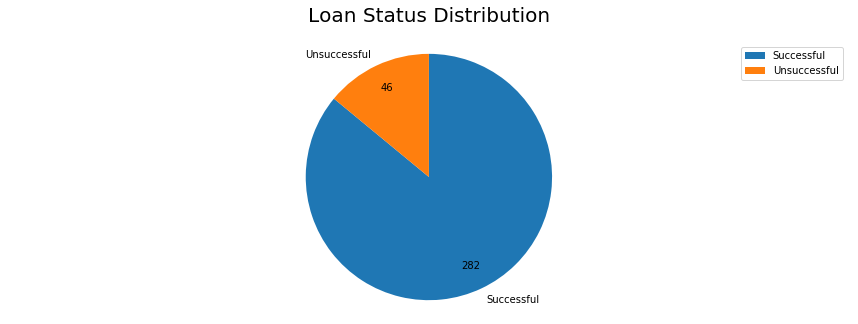

In [116]:
if show_graphs:
    loan_train_copy = loan_train.copy()

    ser = loan_train_copy.groupby('status')['status'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=['Successful', 'Unsuccessful'], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Loan Status Distribution', y=1.05, fontsize=20)
    fig.set_size_inches(15, 5)

As we can see, the dataset is imbalanced, since we have too many examples of successful loans and only a few examples of unsuccessful loans.

*amount* is the amount of money that the client borrowed, *duration* is the duration of the loan in months and *payments* is the amount of each monthly payment. Let's check if the *amount* value is equivalent to *duration* * *payments*.

In [117]:
amount = [loan_train['duration'][x] * loan_train['payments'][x] for x in loan_train.index]

if amount == loan_train['amount'].tolist():
    print ("The lists are identical")
else :
    print ("The lists are not identical")

The lists are identical


So, we can conclude that amount value is equivalent to duration * payments and when we finish the dataset analysis, we can drop *amount* attribute.

[back](#index)
## Districts Data <a id="districts-data"></a>

Let's look at null values distribution.

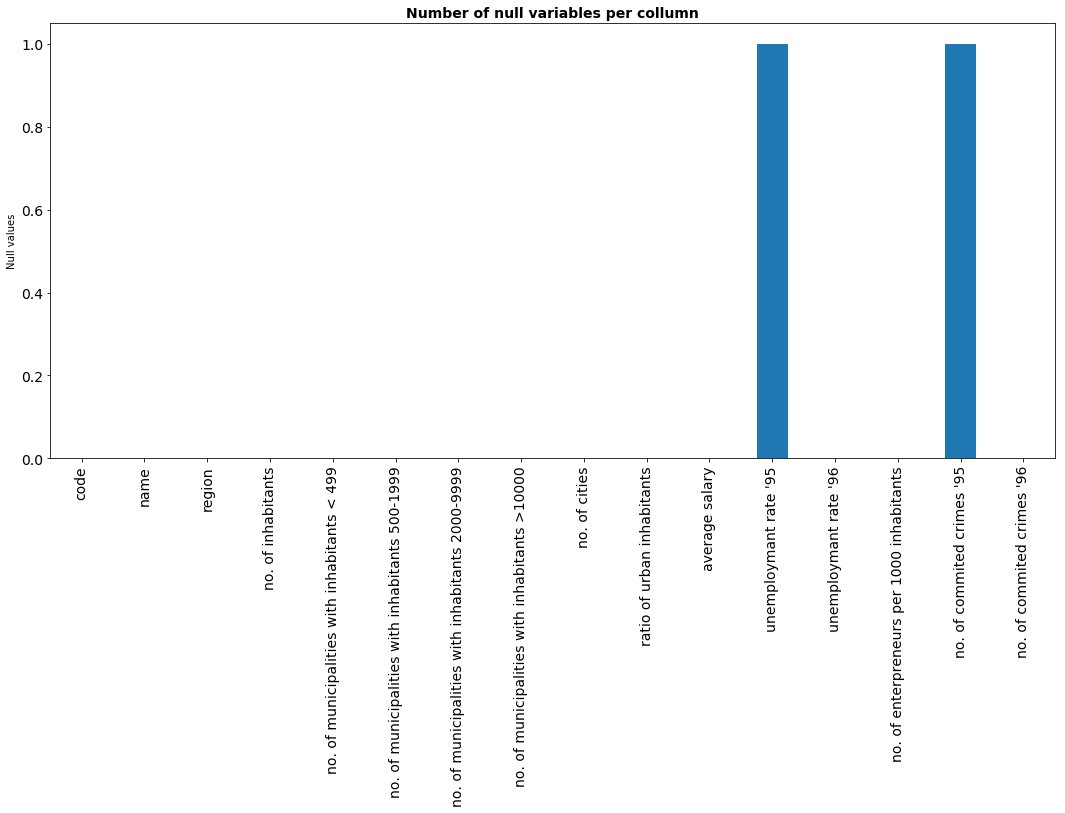

In [118]:
if show_graphs:
    # Null values for each attribute
    district_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

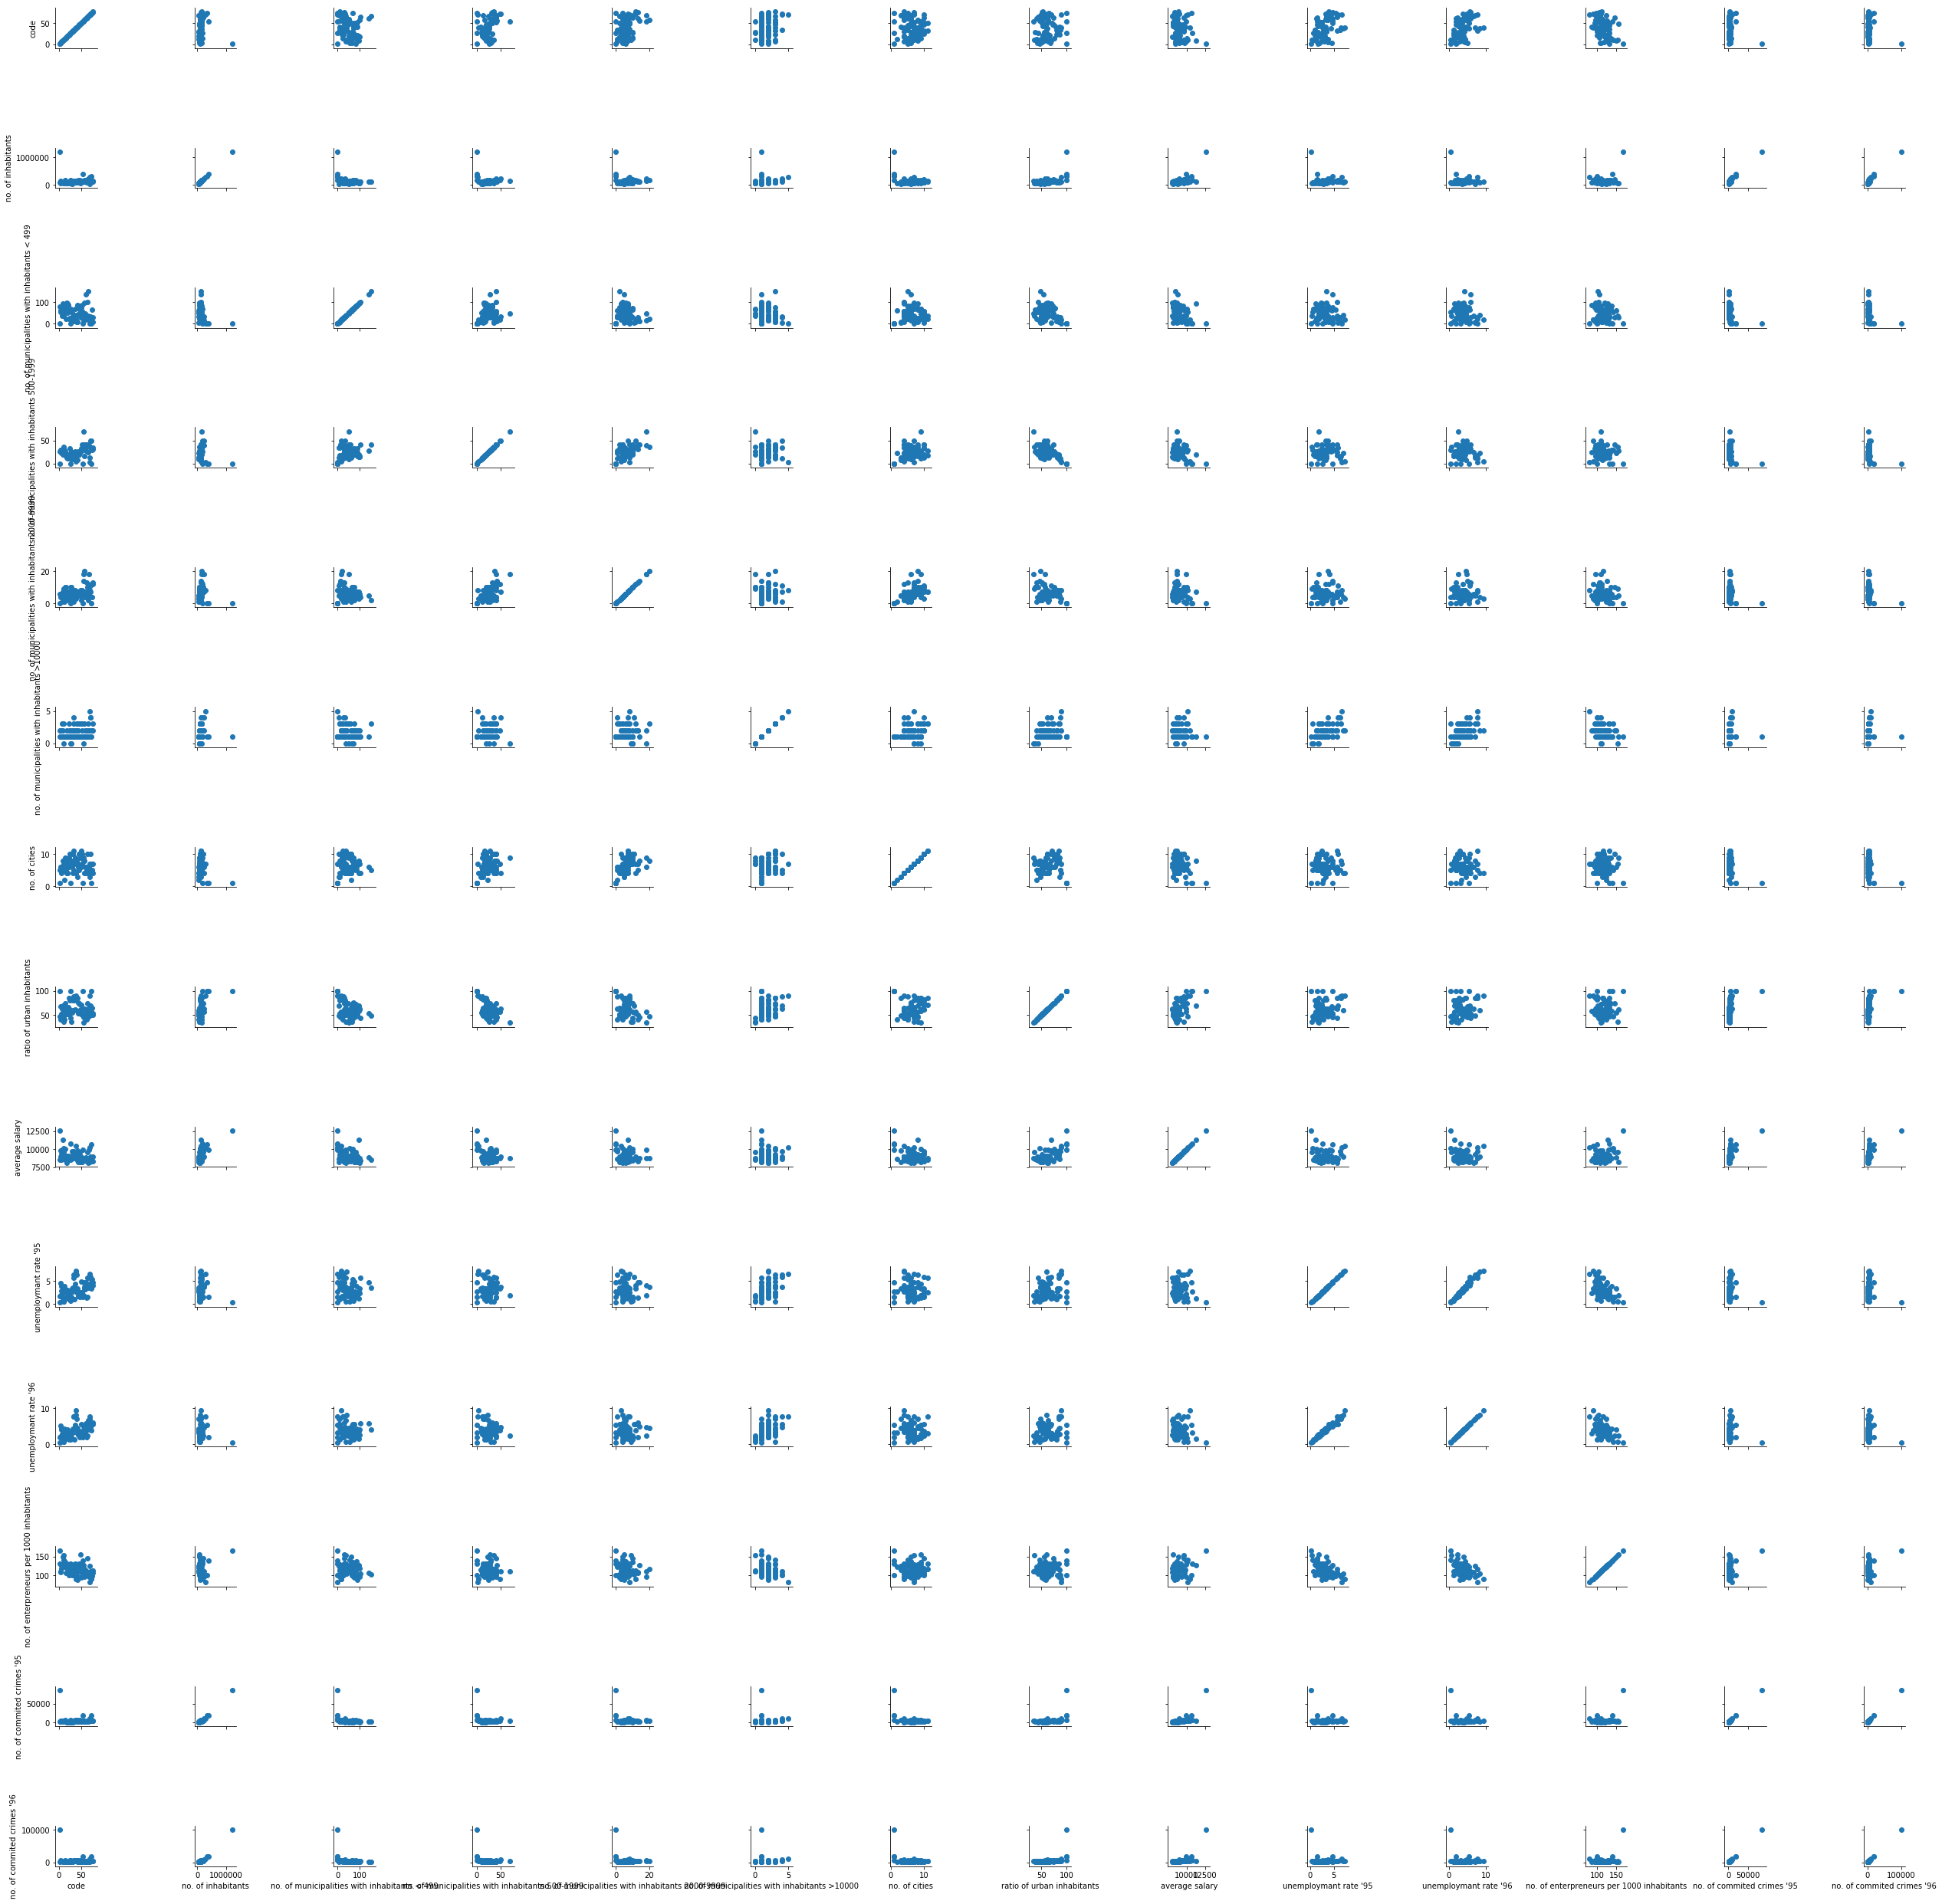

In [119]:
if show_graphs:
    district_scatter_plot = sb.PairGrid(district_data)
    district_scatter_plot.map(plt.scatter)

Let's look at attribute values distribution for each of the columns that contain null values.

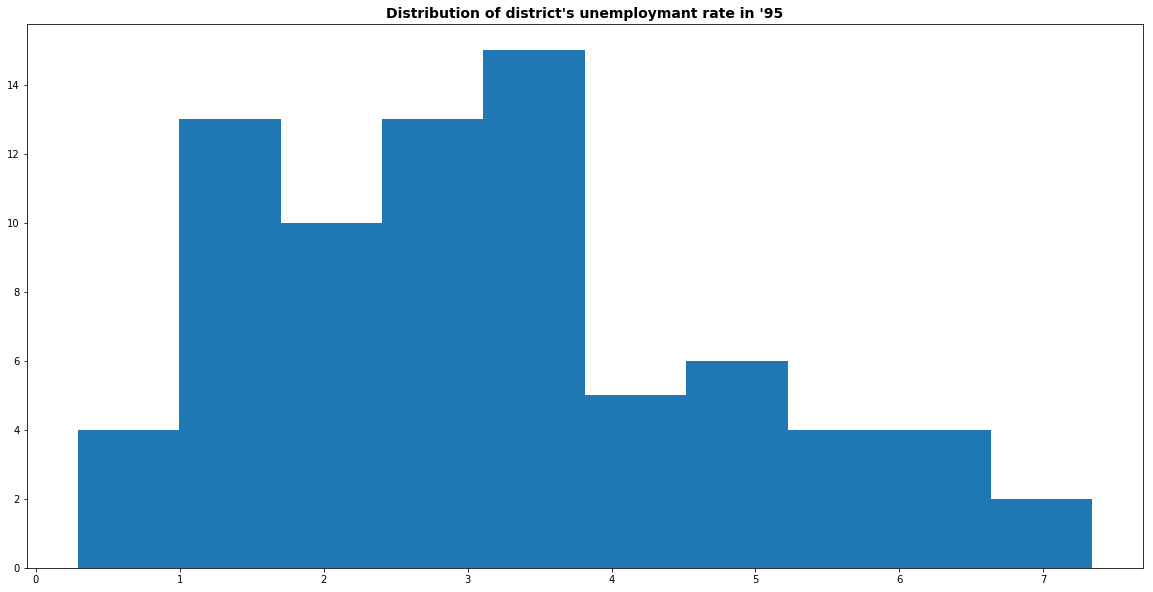

In [120]:
if show_graphs:
    plt.figure(figsize=(20,10))
    plt.title('Distribution of district\'s unemploymant rate in \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.hist(district_data['unemploymant rate \'95'])

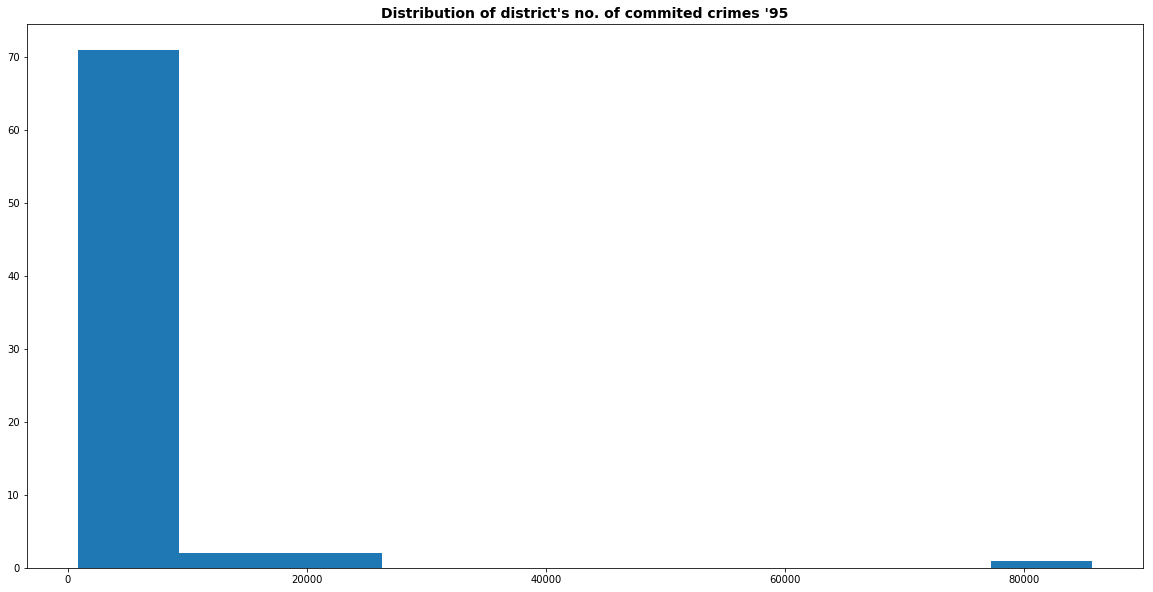

In [121]:
if show_graphs:
    plt.figure(figsize=(20,10))
    plt.title('Distribution of district\'s no. of commited crimes \'95', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.hist(district_data['no. of commited crimes \'95'])

In [122]:
if not run_aggr:
    district_data['unemploymant rate \'95'].fillna(district_data['unemploymant rate \'95'].median(), inplace=True)

    district_data['no. of commited crimes \'95'].fillna(district_data['no. of commited crimes \'95'].mean(), inplace=True)

Let's fill null values in in district's *unemploymant rate in '95* and *district's no. of commited crimes '95* with median and mean values of the column, respectively.

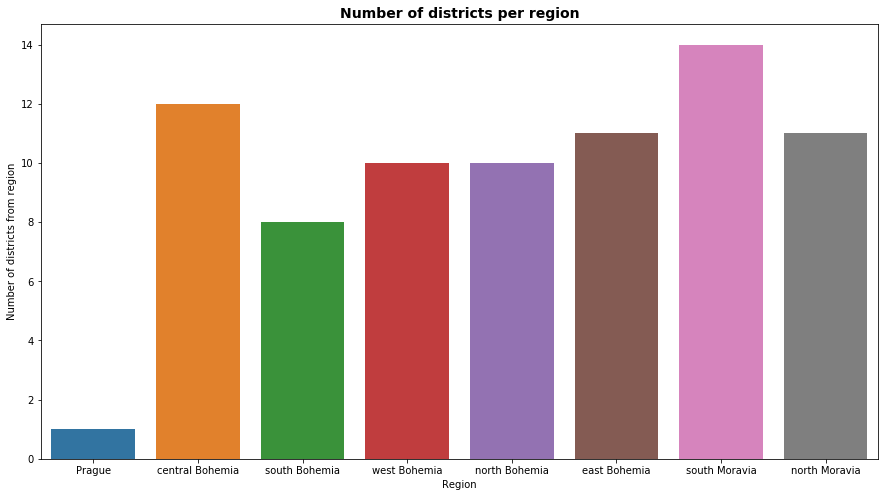

In [123]:
if show_graphs:
    plt.figure(figsize=(15,8))
    sb.countplot(x='region', data=district_data)
    plt.title("Number of districts per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Region');
    plt.ylabel('Number of districts from region');
    plt.show()

To study if the region might have an impact on the acceptance of the loan we will create a graph comparing the percentages of successful loans per region.

In [124]:
# loan_train.status.value_counts()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



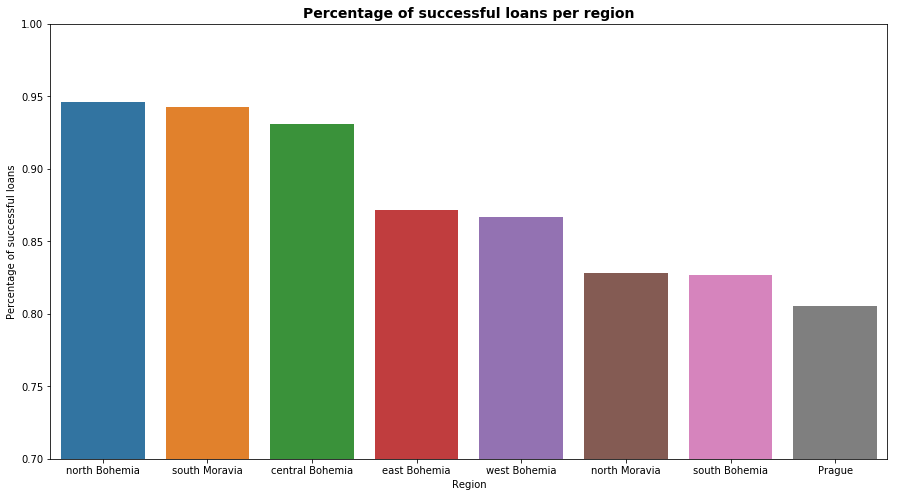

In [125]:
if show_graphs:
    district_data_region = district_data.copy()
    region_data = loan_train
    region_data = pd.merge(region_data, trans_train, on = 'account_id', suffixes = ('', '_trans'))
    region_data = pd.merge(region_data, account_data, on = 'account_id', suffixes = ('', '_account'))
    #train_data = train_data.dropna()
    region_data = pd.merge(region_data, district_data_region.set_index('code'), left_on = 'district_id', right_index = True, suffixes = ('', '_district'))

    region_total = region_data["region"].value_counts()
    tuples_total = [tuple((x, y)) for x, y in region_total.items()]

    regions_status_1 = region_data.loc[region_data['status'] == -1]
    region_total_1 = regions_status_1["region"].value_counts()
    tuples_total_1 = [tuple((x, y)) for x, y in region_total_1.items()]

    lista=[]
    for x in tuples_total:
        for y in tuples_total_1:
            if x[0]==y[0]:
                lista.append((x[0],x[1],y[1]))

    percentages = [(i[0],i[2] / i[1]) for i in lista]
    percentages.sort(key = lambda x: -x[1])

    x = [i[0] for i in percentages]
    y = [i[1] for i in percentages]

    plt.figure(figsize=(15,8))
    sb.barplot(x,y)
    plt.ylim(0.7, 1)
    plt.title("Percentage of successful loans per region", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.xlabel('Region');
    plt.ylabel('Percentage of successful loans');
    plt.show()


The *name* and the *region* of a **district** is not relevant to our analysis, as the *code* parameter is enough to identify a district. 

In [126]:
if not run_aggr:
    # Removing name and region from district
    district_data.drop(['name', 'region'], axis=1, inplace=True)

Now let's see the different values the parameter type can have.

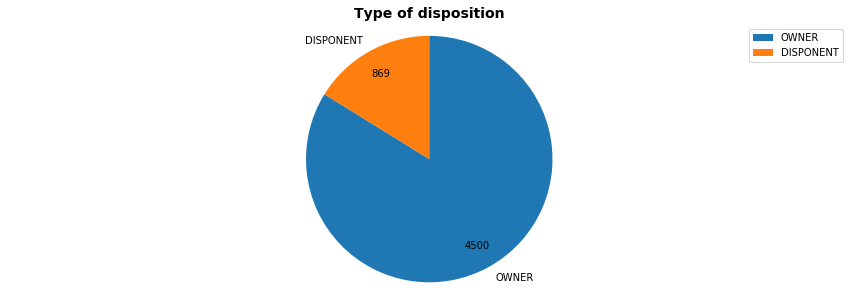

In [127]:
if show_graphs:
    disp_data_pie = disp_data.copy()

    ser = disp_data_pie.groupby('type')['type'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Type of disposition', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 5)

Since only *OWNER* can issue permanent orders and ask for a loan, there is no interess in keeping this parameter in our dataset.

In [128]:
if not run_aggr:
    # only owner can issue permanent orders and ask for a loan
    disponents = disp_data.groupby(["account_id"],as_index=False,group_keys=False).agg({"type": [count_disponents]})
    disponents.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in disponents.columns]
    disp_owners = disp_data[disp_data.type.eq('OWNER')]
    disp_owners.drop(['type'], axis=1, inplace=True)
    disp_owners = pd.merge(disp_owners, disponents, on = "account_id")

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As *birth_number* column doesn't add any value to our model as it is in the original data (it's represented as an int in format YYMMDD for men and YYMM+50DD for women), let's put it in format YY-MM-DD and create a new column called *genre*.

In [129]:
if not run_aggr:
    client_data["birth_number"], client_data["genre"] = parse_client(client_data)
    client_data.head()

We can also see the *genre* distribution, where 1 means male and 0 female.

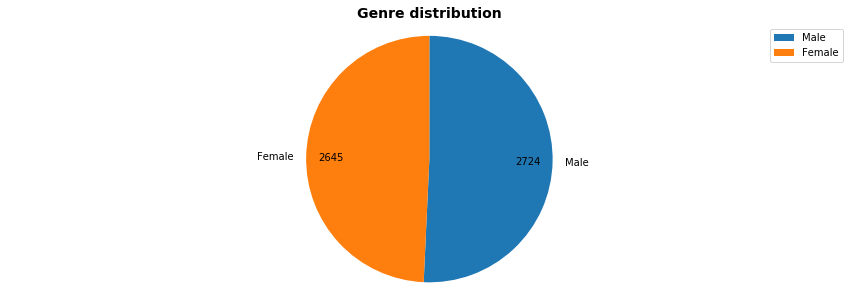

In [130]:
if show_graphs:
    client_data_genre_copy = client_data.copy()

    ser = client_data_genre_copy.groupby('genre')['genre'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=["Male","Female"], startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Genre distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    fig.set_size_inches(15, 5)

[back](#index)
## Transactions Data <a id="transactions-data"></a>

Let's look at null values distribution.

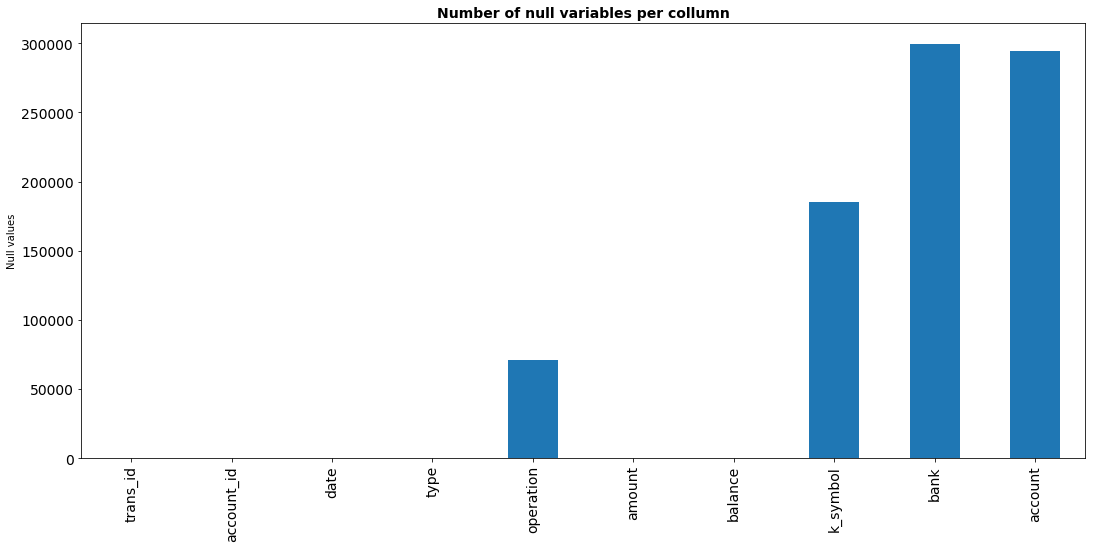

In [131]:
if show_graphs:
    # Null values for each attribute
    trans_train.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

In [132]:
if show_graphs:
    print(trans_train.operation.value_counts())
    print('Null values: ' + str(trans_train.operation.isnull().sum()))
    print()
    print(trans_train.k_symbol.value_counts())
    print('Null values: ' + str(trans_train.k_symbol.isnull().sum()))
    print()
    print(trans_train.type.value_counts())
    print('Null values: ' + str(trans_train.type.isnull().sum()))
    print()

withdrawal in cash              165270
remittance to another bank       70737
credit in cash                   62202
collection from another bank     26505
credit card withdrawal            1210
Name: operation, dtype: int64
Null values: 70761

interest credited                        70761
payment for statement                    58377
household                                42839
                                         19065
old-age pension                          13502
insurrance payment                        6592
sanction interest if negative balance      305
Name: k_symbol, dtype: int64
Null values: 185244

withdrawal            232093
credit                159468
withdrawal in cash      5124
Name: type, dtype: int64
Null values: 0



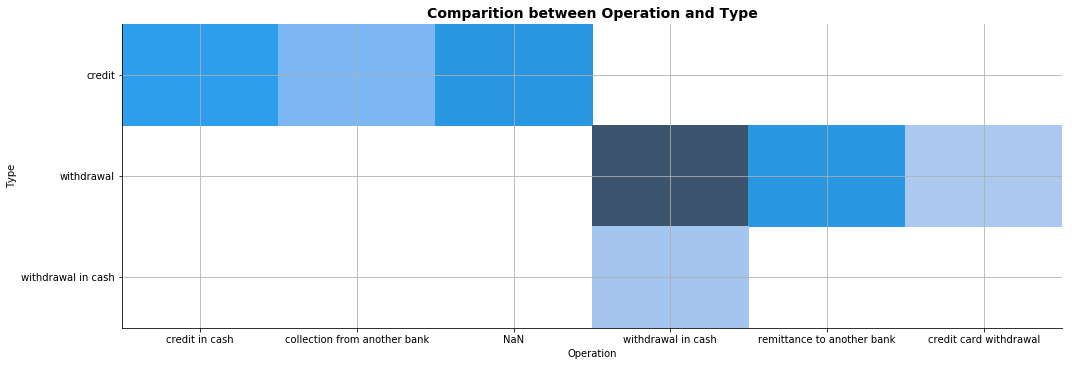

In [133]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.loc[:, trans_data_copy.columns.intersection(['type','operation'])]
    trans_data_copy["operation"] = trans_data_copy["operation"].fillna('NaN')
    trans_data_copy.sort_values("operation")
    sb.displot(trans_data_copy,x='operation', y='type', aspect=3)
    plt.xlabel('Operation');
    plt.ylabel('Type');
    plt.title("Comparition between Operation and Type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.show()

As we can see all the rows with operation *credit in cash* and *collection from another bank* are of type credit. All the *withdrawal in cash*, *remittance to another bank* and *credit cash withdrawal* operations are of the type *withdraw* or *withdrawal with cash* (in the case of the homonymous operation)

Looking for **type** column, let's convert all *withdrawal in cash* occurrences into *withdrawal*, as it is basically the same. 

In [134]:
if not run_aggr:
    trans_train.loc[trans_train['type'] == "withdrawal in cash", 'type'] = "withdrawal"
    trans_test.loc[trans_test['type'] == "withdrawal in cash", 'type'] = "withdrawal"

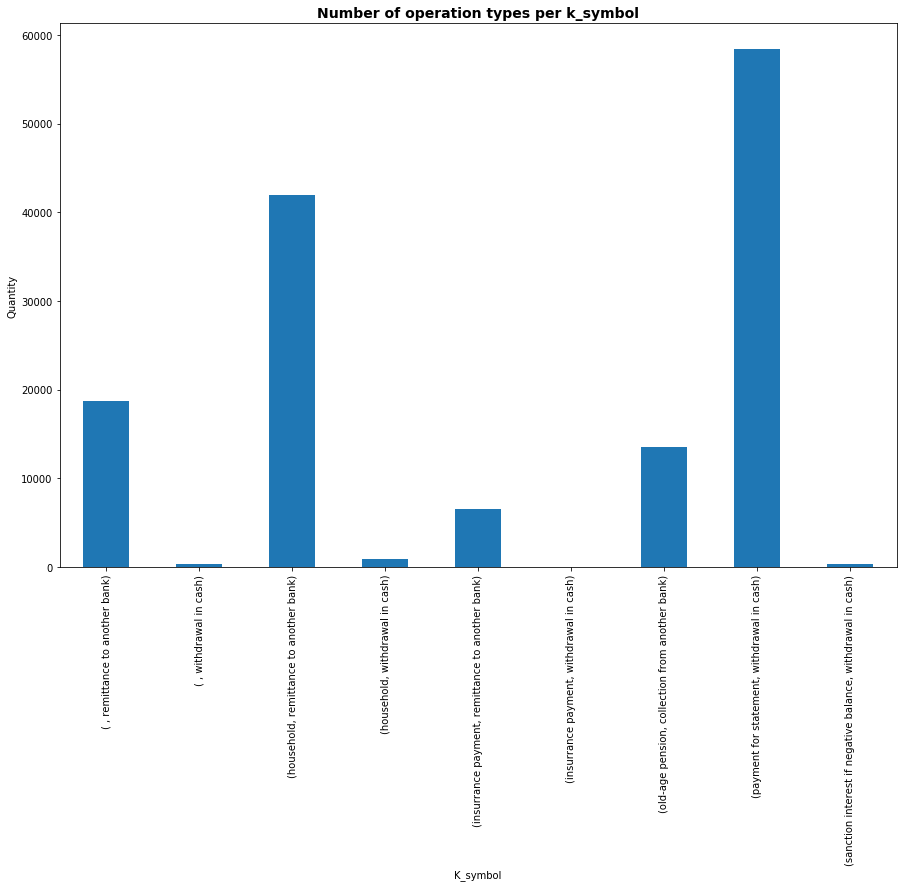

In [135]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.groupby(['k_symbol', 'operation'])['operation'].count()

    plt.rcParams["figure.figsize"] = (15,10)
    trans_data_copy.plot(kind='bar', stacked=True)
    plt.xlabel('K_symbol');
    plt.ylabel('Quantity');
    plt.title("Number of operation types per k_symbol", fontdict={'fontsize': 14, 'fontweight': 'bold'})

    plt.show()

<Figure size 1080x720 with 0 Axes>

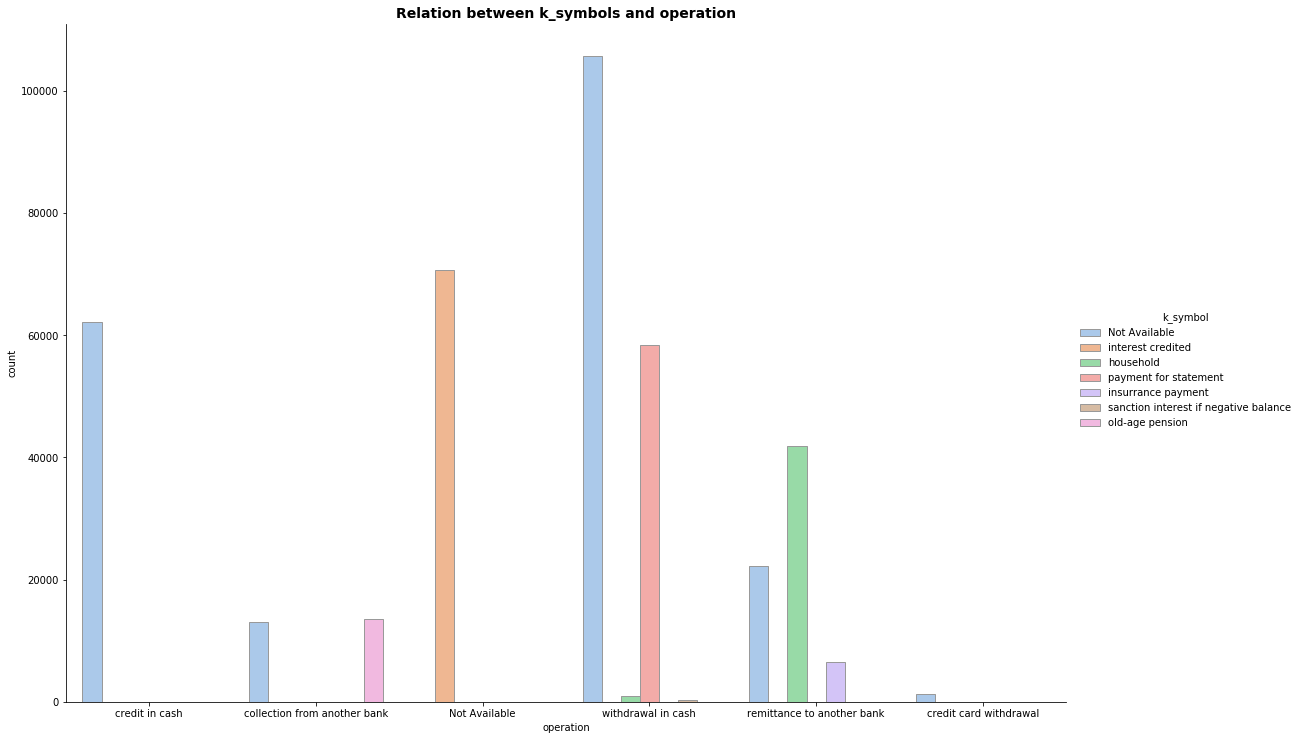

In [136]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy["operation"]=trans_data_copy["operation"].fillna("Not Available")
    trans_data_copy["k_symbol"]=trans_data_copy["k_symbol"].fillna("Not Available")
    trans_data_copy['k_symbol'] = trans_data_copy['k_symbol'].replace([' '],['Not Available'])
    trans_data_copy['operation'] = trans_data_copy['operation'].replace([''],['Not Available'])

    fig = plt.figure()

    sb.catplot(x="operation", hue="k_symbol", kind="count",
                palette="pastel", edgecolor=".6",
                data=trans_data_copy, height=10, aspect=1.5)
    plt.title('Relation between k_symbols and operation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylim(0)
    plt.rcParams['figure.figsize']=(20,10)

    plt.show()


As we can see the great majority of the k_symbol types are directly related to a certain operation type.
All rows that have **operation** column with null value have *interested credited* in *k_symbol* column. We can try to replace the null values of *operation* column with the value that is in *k_symbol* column and then delete *k_symbol* parameter.

In [137]:
if not run_aggr:
    trans_train.loc[trans_train['operation'].isna(), 'operation'] = trans_train.loc[trans_train['operation'].isna(), 'k_symbol']
    trans_test.loc[trans_test['operation'].isna(), 'operation'] = trans_test.loc[trans_test['operation'].isna(), 'k_symbol']

    trans_train.drop(['k_symbol'], axis=1, inplace=True)
    trans_test.drop(['k_symbol'], axis=1, inplace=True)

As follows we can see the months when the most transfers were taken.

<Figure size 1440x720 with 0 Axes>

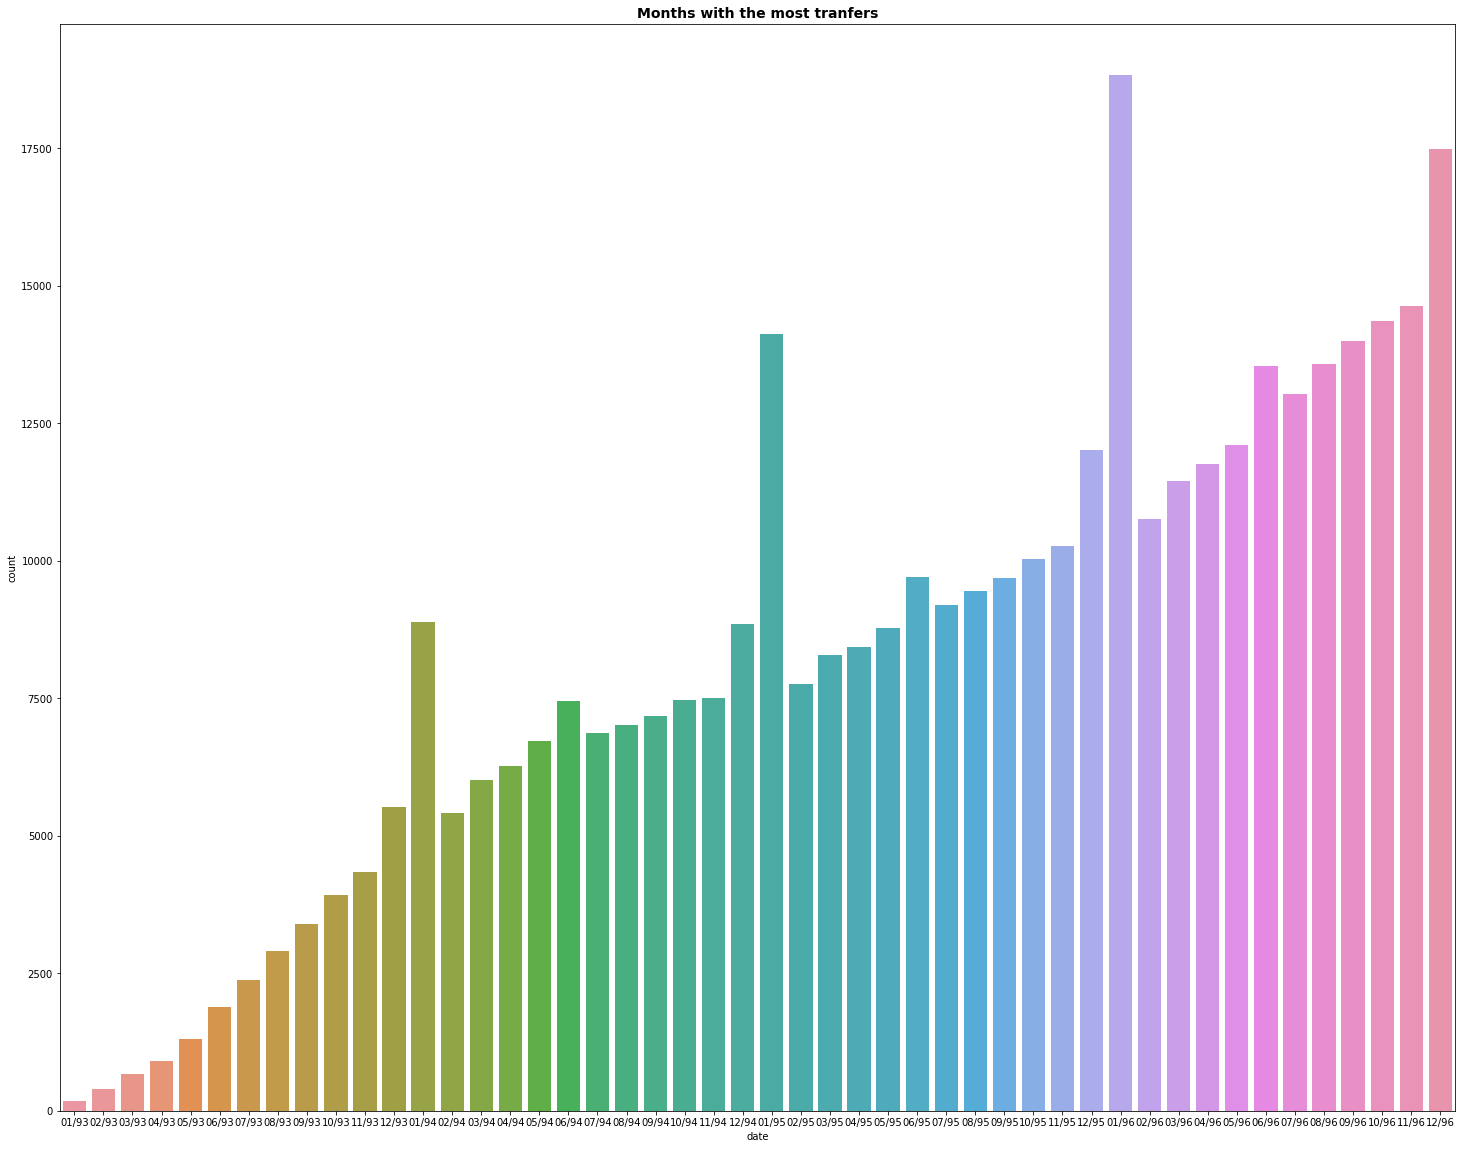

In [138]:
if show_graphs:
    trans_data_copy = trans_train.copy()
    trans_data_copy = trans_data_copy.sort_values('date')
    trans_data_copy = trans_data_copy.astype({'date': str})

    trans_data_copy['date'] = trans_data_copy['date'].apply(lambda x: get_month(x[0:4]))

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Months with the most tranfers", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x="date", data=trans_data_copy)
    plt.show()

Let's now remove the transactions that occur before the client asks for a loan.

In [139]:
if not run_aggr:

    trans_train['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in trans_train['date']]
    loan_train['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_train['date']]
    
    trans_test['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in trans_test['date']]
    loan_test['date'] = [str(int(x))[:2] + "-" + str(int(x))[2:4] + "-" + str(int(x))[4:] for x in loan_test['date']]
    
    trans_train = removeDateAfter(trans_train, loan_train)
    trans_test = removeDateAfter(trans_test, loan_test)

We can remove *bank* and *account* columns, as these columns only record the destination account and have too many null values. *date* column is not relevant to our analysis too.

In [140]:
if not run_aggr:
    trans_train.drop(['bank', 'account', 'date'], axis=1, inplace=True)
    trans_test.drop(['bank', 'account', 'date'], axis=1, inplace=True)

[back](#index)
## Card Data <a id="card-data"></a>

Let's look at null values distribution.

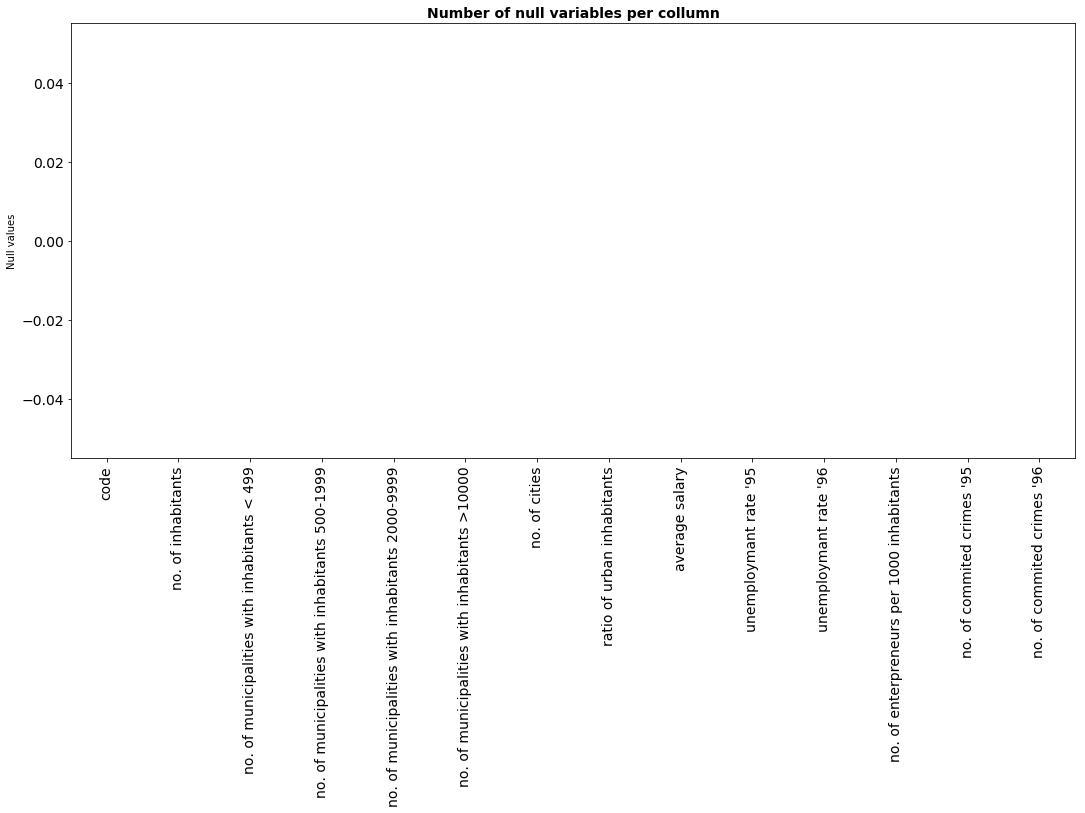

In [141]:
if show_graphs:
    # Null values for each attribute
    district_data.isnull().sum().plot(kind='bar', figsize=(18,8), fontsize=14,);
    plt.title("Number of null variables per collumn", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylabel('Null values');

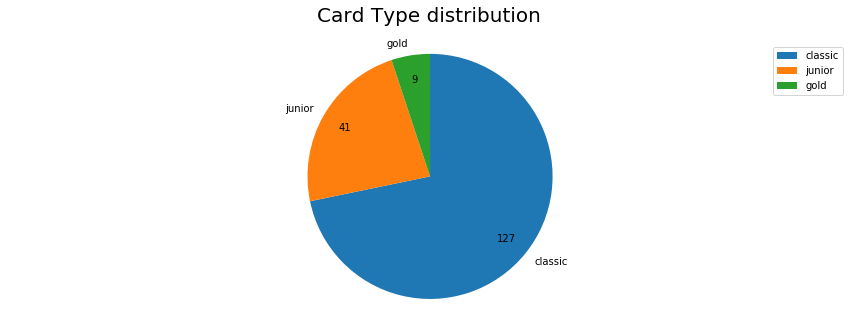

In [142]:
if show_graphs:
    card_data_copy = card_train.copy()

    ser = card_data_copy.groupby('type')['type'].count()
    ser = ser.sort_values(ascending=False)
    ser = ser.iloc[[0,1,2]]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.pie(ser.values, labels=ser.index, startangle=90, autopct=lambda x:int(x/100.*ser.sum()+0.1), pctdistance=0.8, counterclock=False)
    ax.legend()
    plt.axis('equal')
    plt.title('Card Type distribution', y=1.05, fontsize=20)
    fig.set_size_inches(15, 5)

#### [back](#index)
## Data Exploration <a class="anchor" id="data-exploration"></a>

In [143]:
def plot_loan_duration(train_data):
    if show_graphs:
        plt.figure(figsize=(15,10))
        ax = sb.barplot(train_data["duration"], train_data["amount"])
        plt.xlabel('Duration');
        plt.ylabel('Amount');
        plt.title('Loan duration compared the amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [144]:
def plot_number_payments(train_data):
    if show_graphs:
        plt.rcParams["figure.figsize"] = (15,10)
        ax = plt.plot(train_data["amount"], train_data["payments"], linestyle='none', marker='o', alpha=0.3)
        plt.title('Number of payments per different amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.xlabel('Amount');
        plt.ylabel('Payments');
        plt.show()

In [145]:
def plot_distribution_amount(train_data):
    if show_graphs:
        plt.figure(figsize=(20,10))
        #ax = sb.barplot(train_data["amount_trans"], train_data["balance"])
        plt.plot(train_data["balance_mean"],train_data["amount_mean"], 'o', color='green');
        plt.title('Distribution of tranfer amount by balance', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.ylabel('Transfer Amount');
        plt.xlabel('Balance');

        plt.show()

In [146]:
def plot_cities_success(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])

        train_data_copy = train_data_copy.groupby(['no. of cities', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Number of cities per district and loan success rate", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [147]:
def plot_inhabitants_success(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()

        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])

        fig = plt.figure()
        sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
        plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.ylim(0)
        fig.set_size_inches(15, 15)
        plt.show()

In [148]:
def plot_success_decade(train_data):
    if show_graphs:
        percentage = []
        train_data_copy = train_data.copy()

        train_data_copy = train_data_copy.astype({'age_loan': str})

        train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])
        
        train_data_copy = train_data_copy.groupby(['age_loan', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Loan success rate per decade of age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [149]:
def plot_success_decade_genre(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()

        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])
        train_data_copy['genre'] = train_data_copy['genre'].replace([0,1],['Female','Male'])

        train_data_copy = train_data_copy.groupby(['genre', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Loan success rate per genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [150]:
def plot_amount_age_genre(train_data):
    if show_graphs:
        plt.figure(figsize=(15,10))

        train_data_names = train_data.copy()
        train_data_names["genre"] = train_data_names["genre"].astype(str)
        train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

        sb.scatterplot(train_data_names["amount"],train_data_names["age_loan"],train_data_names["genre"], alpha=0.5, sizes=(10, 1000), hue="time")
        plt.xlabel("Amount")
        plt.ylabel("Age")
        plt.title("Amount by age and genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [151]:
def plot_amount_age(train_data):
    if show_graphs:
        train_data_names = train_data.copy()

        train_data_names = train_data_names.astype({'age_loan': str})

        train_data_names['age_loan'] = train_data_names['age_loan'].apply(lambda x: get_decade(x))

        train_data_names = train_data_names.sort_values('age_loan')

        plt.figure(figsize=(15,10))

        sb.boxplot(x=train_data_names["age_loan"], y=train_data_names["amount"])
        plt.title("Loan amount by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [152]:
def plot_date_amount_age(train_data):
    if show_graphs:
        train_data_ages = train_data.copy()

        train_data_ages = train_data_ages.astype({'age_loan': str})

        train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

        train_data_ages = train_data_ages.astype({'age_account': str})

        train_data_ages['age_account'] = train_data_ages['age_account'].apply(lambda x: get_decade(x))

        train_data_names = train_data_ages.sort_values('age_loan')
        sb.barplot(x='age_account', y='amount', hue='age_loan', data=train_data_ages, saturation=0.8)
        plt.title("Date of creation of account compared to amount and age when the loan was made", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [153]:
def plot_balance_amount_age(train_data):
    if show_graphs:
        train_data_ages = train_data.copy()

        train_data_ages = train_data_ages.astype({'age_loan': str})

        train_data_ages['age_loan'] = train_data_ages['age_loan'].apply(lambda x: get_decade(x))

        train_data_balance = train_data_ages.astype({'balance_mean': str})

        train_data_balance['balance'] = train_data_balance['balance_mean'].apply(lambda x: get_balance(x))

        train_data_balance = train_data_balance.sort_values('balance_mean')
        sb.boxplot(x='balance', y='amount', hue='age_loan', data=train_data_balance, saturation=0.8)
        plt.title("Balance and amount of loan by age", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [154]:
def plot_salary_age_district(train_data):
    if show_graphs:
        plt.figure(figsize=(15,10))

        train_data_names = train_data.copy()
        train_data_names["genre"] = train_data_names["genre"].astype(str)
        train_data_names["genre"].replace({"1": "Male" , "0": "Female"}, inplace=True)

        sb.scatterplot(train_data_names["average salary"],train_data_names["age_loan"],train_data_names["district_id"], alpha=0.5, sizes=(10, 1000), hue="time")
        plt.xlabel("Average Salary")
        plt.ylabel("Age")
        plt.title("Average Salary by age and district", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

As follows we can see the average salary by age.

In [155]:
def plot_average_decade(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy = train_data_copy.astype({'age_loan': str})

        train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

        train_data_copy = train_data_copy.sort_values('age_loan')
        train_data_copy["average salary"] = train_data_copy["average salary"].astype(float)

        fig = plt.figure()
        sb.boxplot(x=train_data_copy["age_loan"], y=train_data_copy["average salary"])
        plt.xlabel('age_loan', y=1.05, fontsize=15, labelpad=15)
        plt.ylabel('average salary', x=0.7, fontsize=15, labelpad=15)
        plt.title('Average salary per decade of age', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        fig.set_size_inches(15, 10)
        plt.show()

In [156]:
def plot_average_genre(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy["genre"] = train_data_copy["genre"].astype(str)
        train_data_copy["genre"].replace({"0": "Female","1": "Male"}, inplace=True)

        plt.figure(figsize=(15,10))
        plt.ylim(9000, 10000)
        sb.barplot(x = train_data_copy["genre"], y = train_data_copy["average salary"])
        plt.title("Average Salary by genre", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        # display
        plt.show()

In [157]:
def plot_card_success(train_data):
    if show_graphs:
        train_data_copy = train_data.copy()
        train_data_copy = train_data_copy.astype({'status': str})
        train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])
        train_data_copy['type'] = train_data_copy['type'].fillna('NaN')
        
        train_data_copy = train_data_copy.groupby(['type', 'status'])['status'].count().unstack().fillna(0)

        plt.rcParams["figure.figsize"] = (15,10)
        train_data_copy.plot(kind='bar', stacked=True)
        plt.title("Card type and loan success rate", fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.show()

In [158]:
def plot_balance_status(train_data):
    if show_graphs:
        plt.figure(figsize=(20,10))
        plt.plot(train_data["status"],train_data["balance_mean"], 'o', color='green');
        plt.title('Distribution of tranfer amount by balance', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        plt.ylabel('Balance');
        plt.xlabel('Status');

        plt.show()

[back](#index)
## Dataset Managing <a id="dataset-managing"></a>

In [159]:
if not run_aggr:
    loan_train_plot, district_data_train_plot, client_data_train_plot, card_train_plot, trans_train_plot, account_data_train_plot, disp_data_train_plot = loan_train.copy(), district_data.copy(), client_data.copy(), card_train.copy(), trans_train.copy(), account_data.copy(), disp_owners.copy()

In [160]:
if not run_aggr:
    loan_test_plot, district_data_test_plot, client_data_test_plot, card_test_plot, trans_test_plot, account_data_test_plot, disp_data_test_plot = loan_test.copy(), district_data.copy(), client_data.copy(), card_test.copy(), trans_test.copy(), account_data.copy(), disp_owners.copy()

Call the merge and aggregate function for both the train and test data

In [161]:
if not run_aggr:
    train_data = merge_aggr_dataset_plots(loan_train_plot, district_data_train_plot, client_data_train_plot, card_train_plot, trans_train_plot, account_data_train_plot, disp_data_train_plot)
else:
    train_data = merge_aggr_dataset(loan_train_aggr, district_data_train_aggr, client_data_train_aggr, card_train_aggr, trans_train_aggr, account_data_train_aggr, disp_data_train_aggr)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning:

invalid value encountered in multiply

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Ana

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           328 non-null    float64
 1   account_id                                        328 non-null    float64
 2   date                                              328 non-null    object 
 3   amount                                            328 non-null    float64
 4   duration                                          328 non-null    float64
 5   payments                                          328 non-null    float64
 6   status                                            328 non-null    float64
 7   operation_count                                   328 non-null    float64
 8   operation_count_credit_cash                       328 non-null    float64
 9   operation_count_colle

In [162]:
if not run_aggr:
    test_data = merge_aggr_dataset_plots(loan_test_plot, district_data_test_plot, client_data_test_plot, card_test_plot, trans_test_plot, account_data_test_plot, disp_data_test_plot)
else:
    test_data = merge_aggr_dataset(loan_test_aggr, district_data_test_aggr, client_data_test_aggr, card_test_aggr, trans_test_aggr, account_data_test_aggr, disp_data_test_aggr)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 353
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           354 non-null    int64  
 1   account_id                                        354 non-null    int64  
 2   date                                              354 non-null    object 
 3   amount                                            354 non-null    int64  
 4   duration                                          354 non-null    int64  
 5   payments                                          354 non-null    int64  
 6   status                                            0 non-null      float64
 7   operation_count                                   354 non-null    int64  
 8   operation_count_credit_cash                       354 non-null    int64  
 9   operation_count_colle

In [163]:
if not run_aggr:
    card_train["hasCard"] = card_train["card_id"].fillna(0)
    card_train.loc[card_train["hasCard"] != 0, "hasCard"] = 1
    card_train["hasCard"] = card_train["hasCard"].astype(bool)
    
    card_test["hasCard"] = card_test["card_id"].fillna(0)
    card_test.loc[card_test["hasCard"] != 0, "hasCard"] = 1
    card_test["hasCard"] = card_test["hasCard"].astype(bool)

Now we can create a column *age_loan* where we will keep the age of the client at the time of the requested loan.

In [164]:
if not run_aggr:
    train_data["age_loan"] = parse_dates_no_conversion(train_data, "date", "birth_number")
    test_data["age_loan"] = parse_dates_no_conversion(test_data, "date", "birth_number")

Also, let's create a new column that represents the age of each client when he creates the account (*age_account*).

In [165]:
if not run_aggr:
    train_data["age_account"] = parse_dates(train_data, "date_account", "birth_number")
    test_data["age_account"] = parse_dates(test_data, "date_account", "birth_number")

Now, let's simplify *age_loan* and *age_account* values, converting them into age ranges divided by decades.

In [166]:
if not run_aggr:
    train_data["age_loan_range"] = parse_date_ranges(train_data, "age_loan")
    test_data["age_loan_range"] = parse_date_ranges(test_data, "age_loan")

    train_data["age_account_range"] = parse_date_ranges(train_data, "age_account")
    test_data["age_account_range"] = parse_date_ranges(test_data, "age_account")

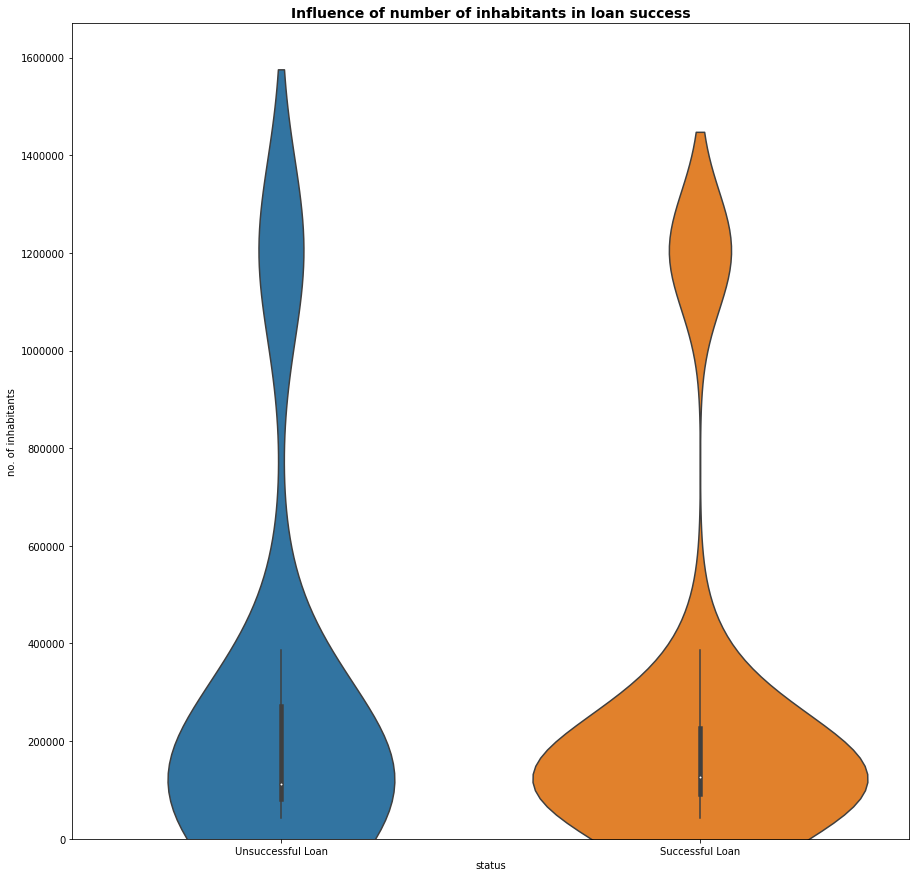

In [167]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])

    fig = plt.figure()
    sb.violinplot(y=train_data_copy["no. of inhabitants"], x=train_data_copy["status"])
    plt.title('Influence of number of inhabitants in loan success', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    plt.ylim(0)
    fig.set_size_inches(15, 15)
    plt.show()

In [168]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 82 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           328 non-null    float64
 1   account_id                                        328 non-null    float64
 2   date                                              328 non-null    object 
 3   amount                                            328 non-null    float64
 4   duration                                          328 non-null    float64
 5   payments                                          328 non-null    float64
 6   status                                            328 non-null    float64
 7   operation_count                                   328 non-null    float64
 8   operation_count_credit_cash                       328 non-null    float64
 9   operation_count_colle

<Figure size 1440x720 with 0 Axes>

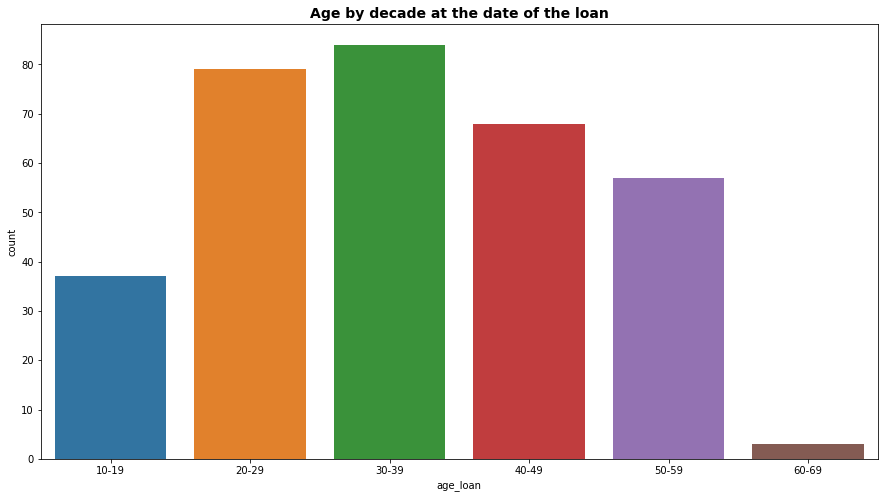

In [169]:
if show_graphs:
    train_data_copy = train_data.copy()

    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.astype({'age_loan': str})

    train_data_copy['age_loan'] = train_data_copy['age_loan'].apply(lambda x: get_decade(x))

    train_data_copy = train_data_copy.sort_values('age_loan')

    fig = plt.figure()
    plt.figure(figsize=(15,8))
    plt.title("Age by decade at the date of the loan", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x="age_loan", data=train_data_copy)

    plt.show()

The age distribution when the loan is asked demonstrates an expected pattern: there are more loan requests when people are younger.

Now we can see the months when the accounts were created.

<Figure size 1440x720 with 0 Axes>

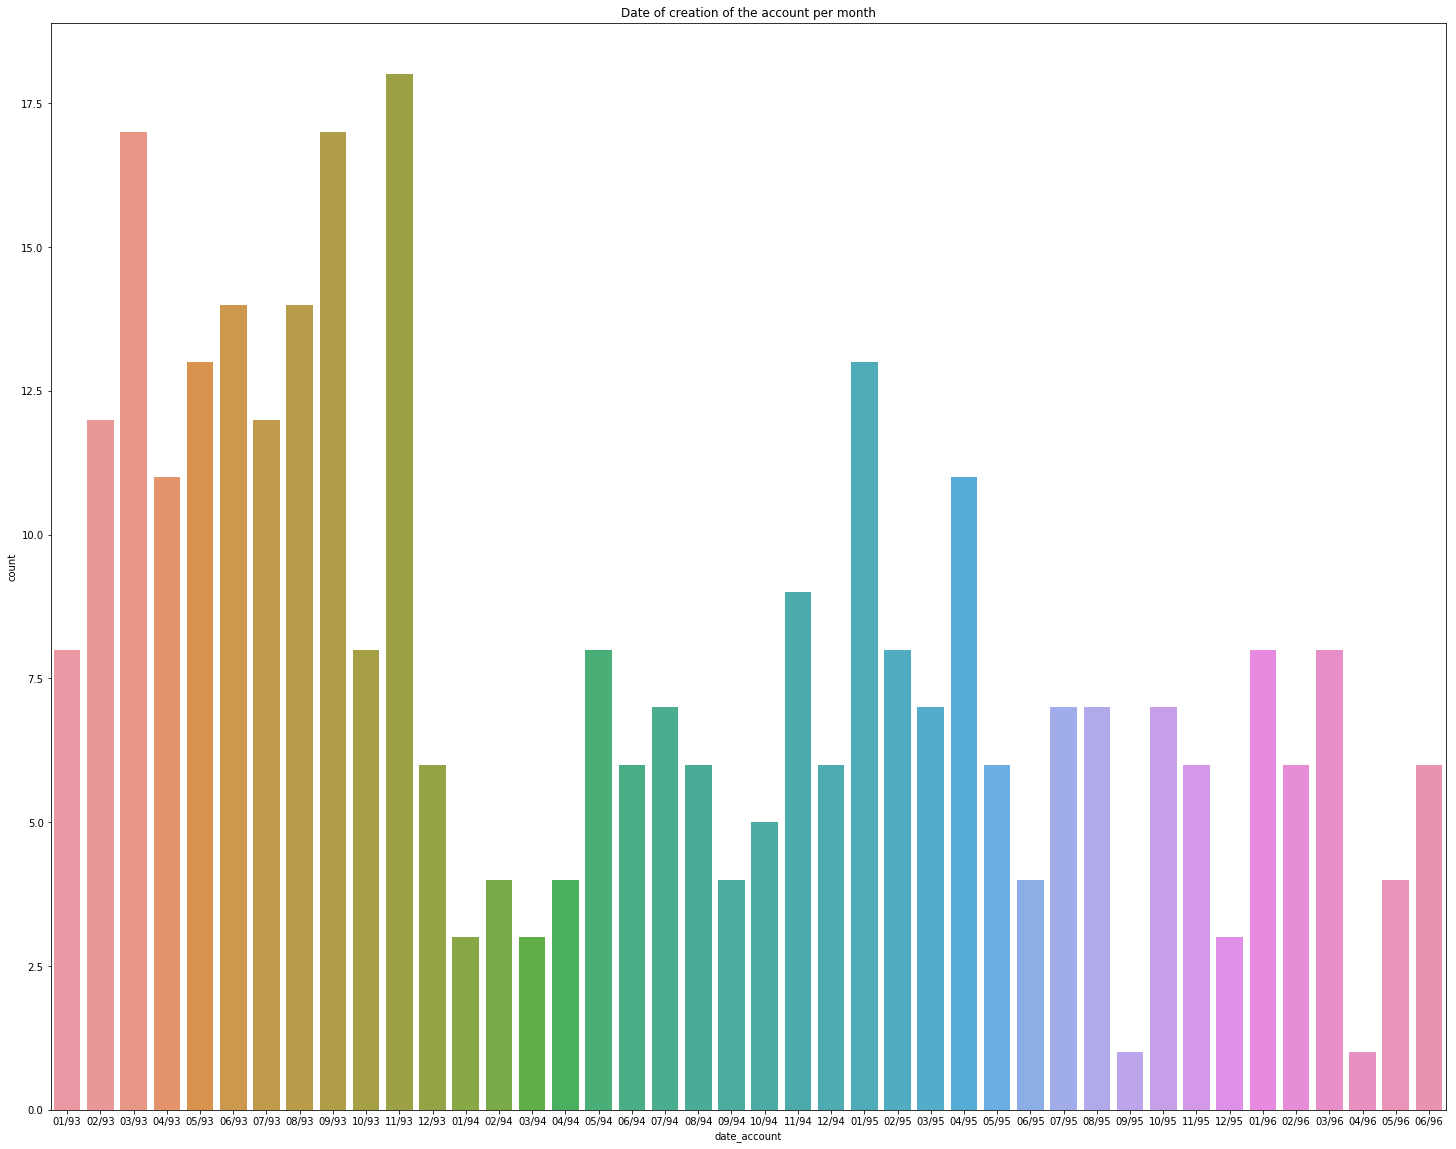

In [170]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.sort_values('date_account')
    train_data_copy = train_data_copy.astype({'date_account': str})

    train_data_copy['date_account'] = train_data_copy['date_account'].apply(lambda x: get_month(x[0:4]))

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Date of creation of the account per month")
    ax = sb.countplot(x="date_account", data=train_data_copy)

    plt.show()

We can also see the month and year of when the loans were created and their relation to the number of successful loans.

<Figure size 1440x720 with 0 Axes>

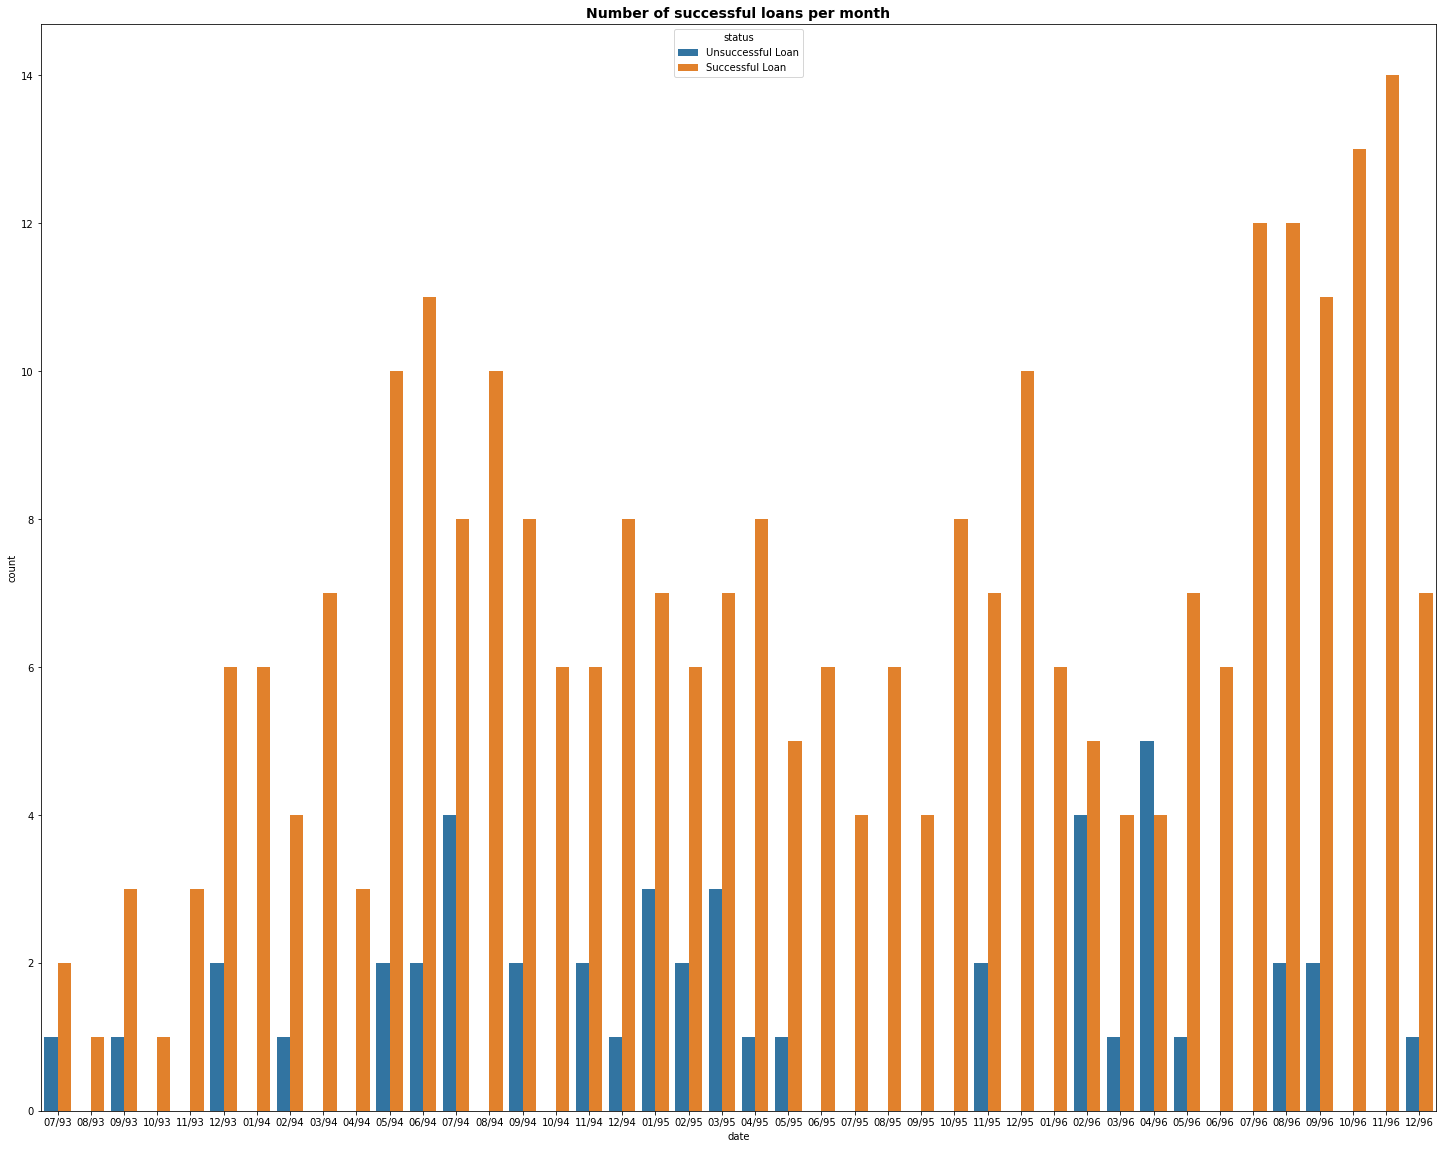

In [171]:
if show_graphs:
    train_data_copy = train_data.copy()
    train_data_copy = train_data_copy.sort_values('date')
    train_data_copy = train_data_copy.astype({'date': str})

    train_data_copy['date'] = train_data_copy['date'].apply(lambda x: get_month_parsed(x[0:5]))

    train_data_copy = train_data_copy.astype({'status': str})
    train_data_copy['status'] = train_data_copy['status'].replace(['1.0','-1.0'],['Unsuccessful Loan','Successful Loan'])

    fig = plt.figure()
    plt.figure(figsize=(25,20))
    plt.title("Number of successful loans per month", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax = sb.countplot(x ='date', hue = "status", data = train_data_copy)

    plt.show()

In [172]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 82 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           328 non-null    float64
 1   account_id                                        328 non-null    float64
 2   date                                              328 non-null    object 
 3   amount                                            328 non-null    float64
 4   duration                                          328 non-null    float64
 5   payments                                          328 non-null    float64
 6   status                                            328 non-null    float64
 7   operation_count                                   328 non-null    float64
 8   operation_count_credit_cash                       328 non-null    float64
 9   operation_count_colle

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



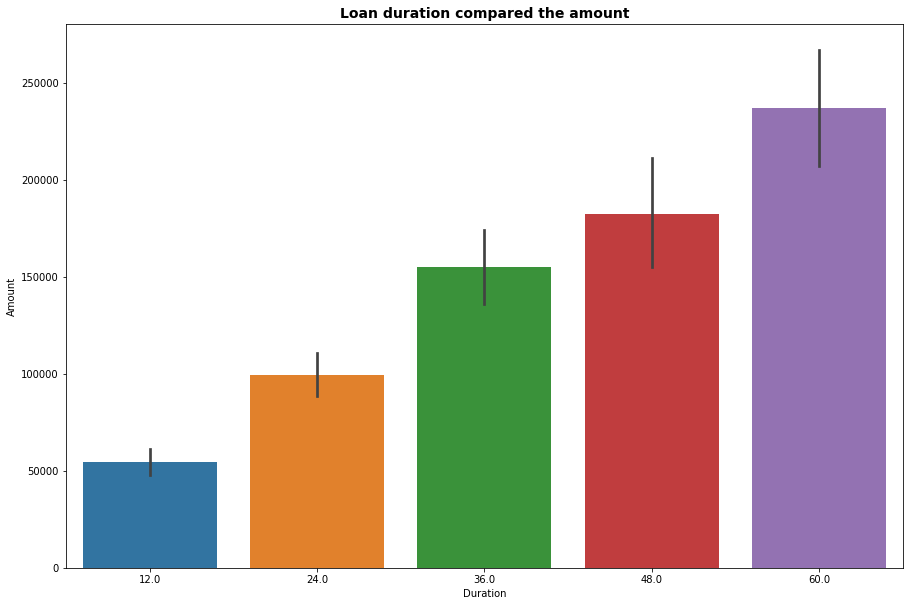

In [173]:
plot_loan_duration(train_data)

We can clearly see that with bigger loan amounts the time taken to repay them is exponentially higher.

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



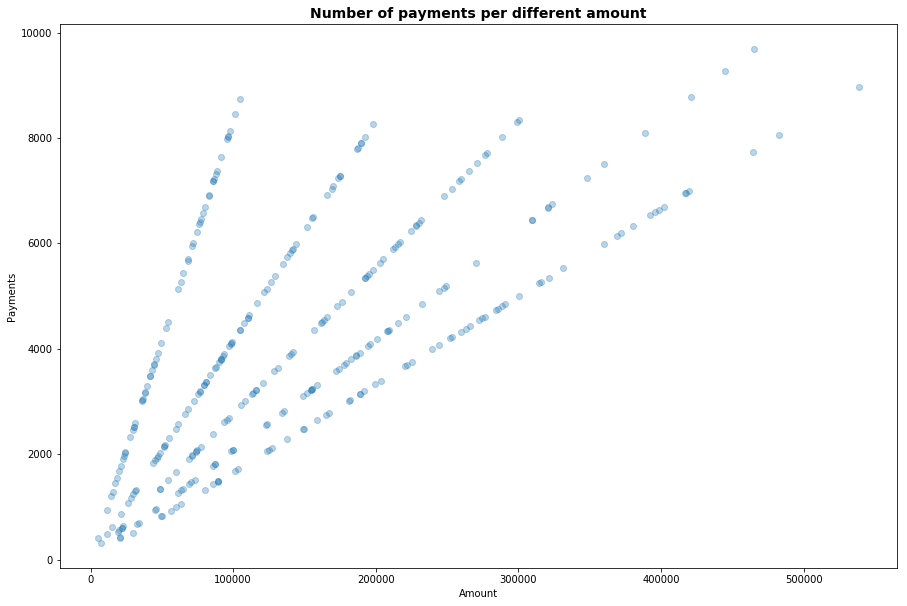

In [174]:
plot_number_payments(train_data)

As we can check by the values in the graph, it seems that the number of payments is defined by the bank since the results are very linear and follow a line according to the amount loaned.

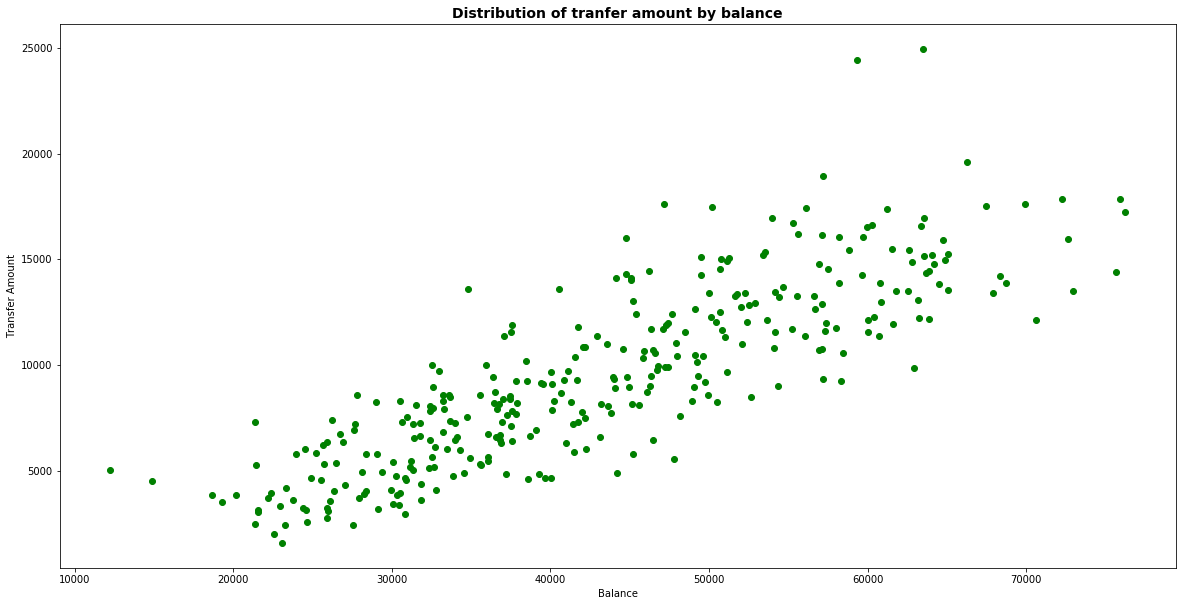

In [175]:
plot_distribution_amount(train_data)

As we can see as the balance increases the transfer amount also increase and is rarely higher than the balance. It can also be seen that a straight continous line exists with gradient 1. This means the amount of some transfers are actually correspondent, or close, to the total amount in the account.

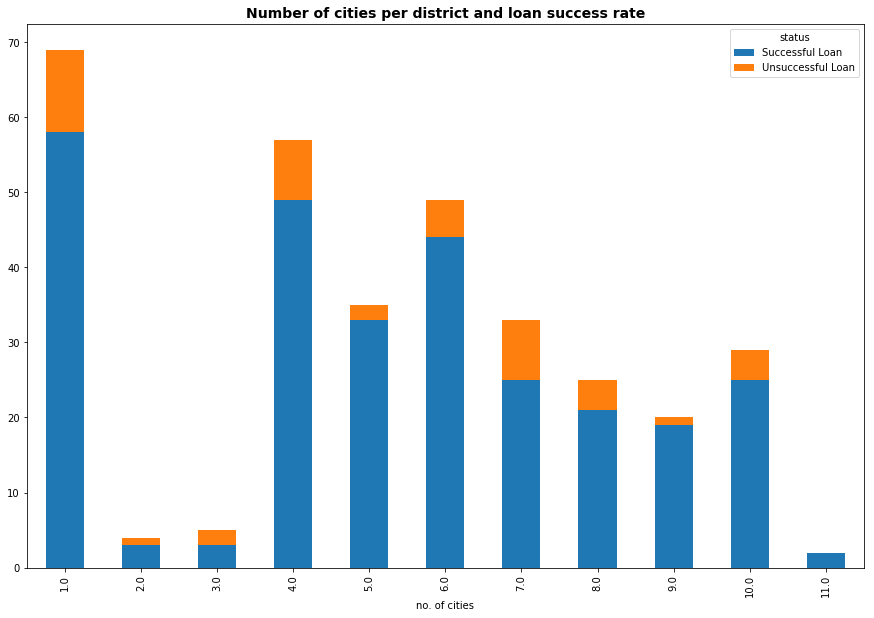

In [176]:
plot_cities_success(train_data)

There's no relation between the number of cities per district and the success of a loan.

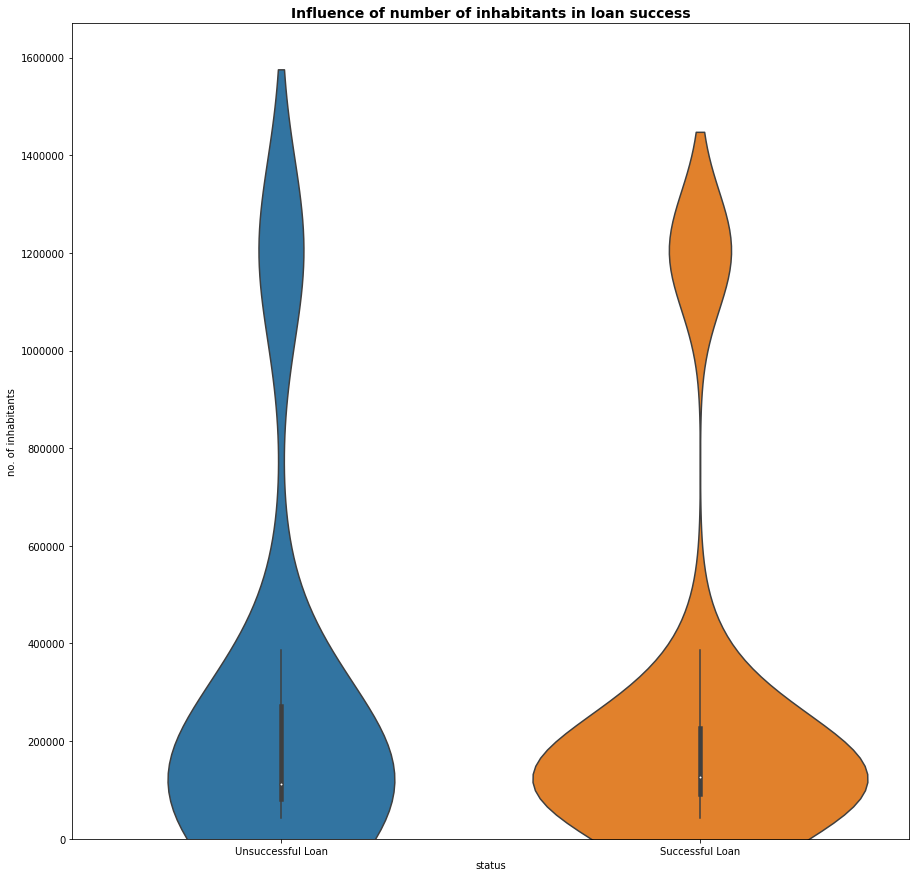

In [177]:
plot_inhabitants_success(train_data)

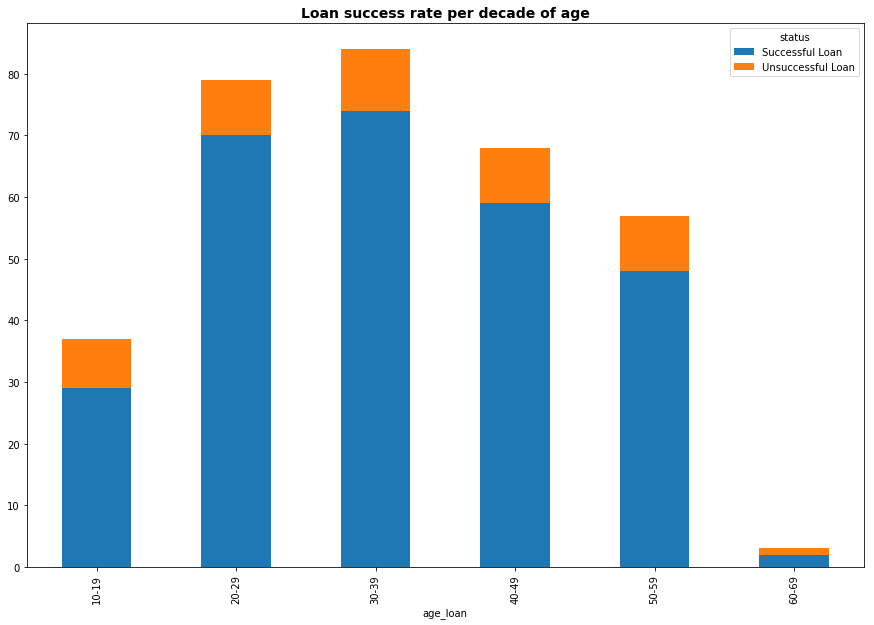

In [178]:
plot_success_decade(train_data)

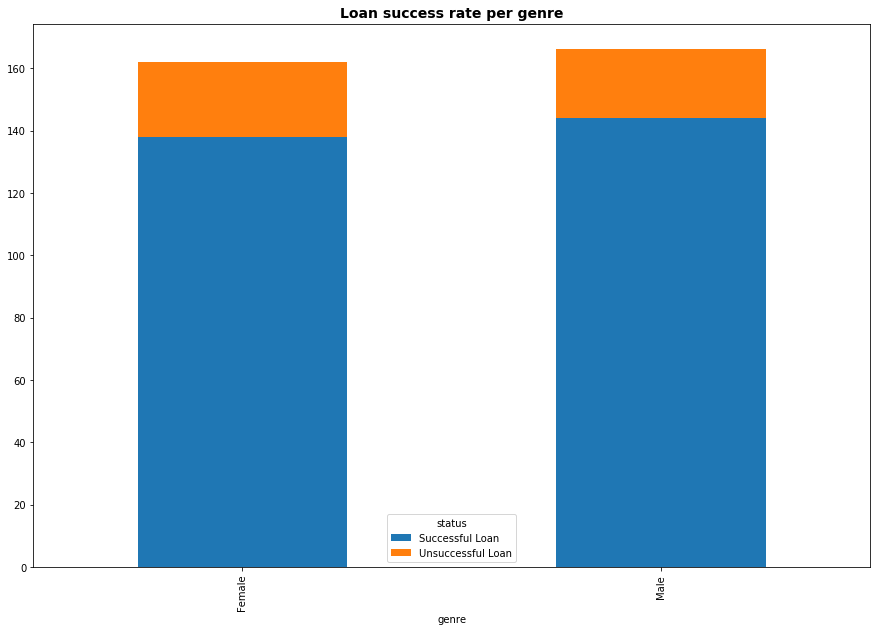

In [179]:
plot_success_decade_genre(train_data)

There is no relation between the *genre* of a person and the *status* of the respective loan.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



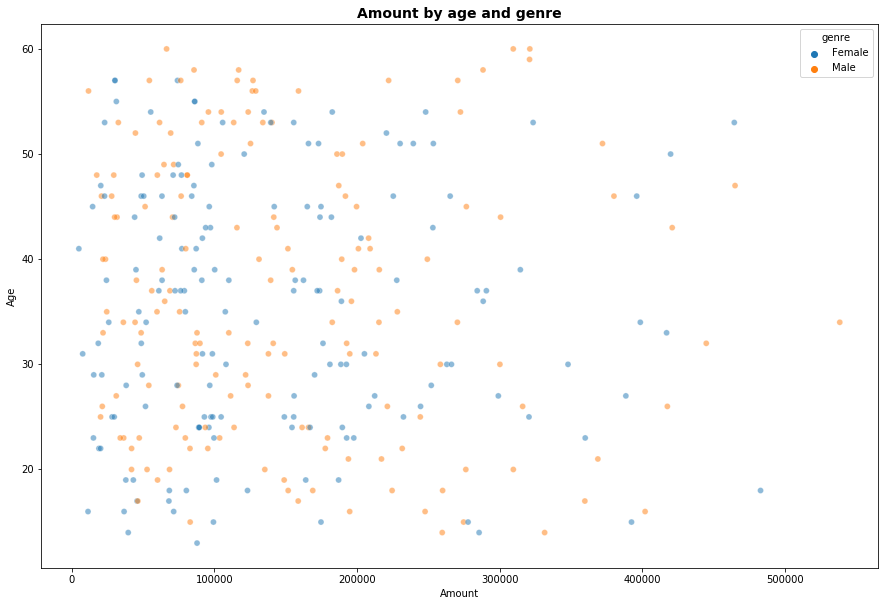

In [180]:
plot_amount_age_genre(train_data)

There is no relation between age, genre and loan amount.

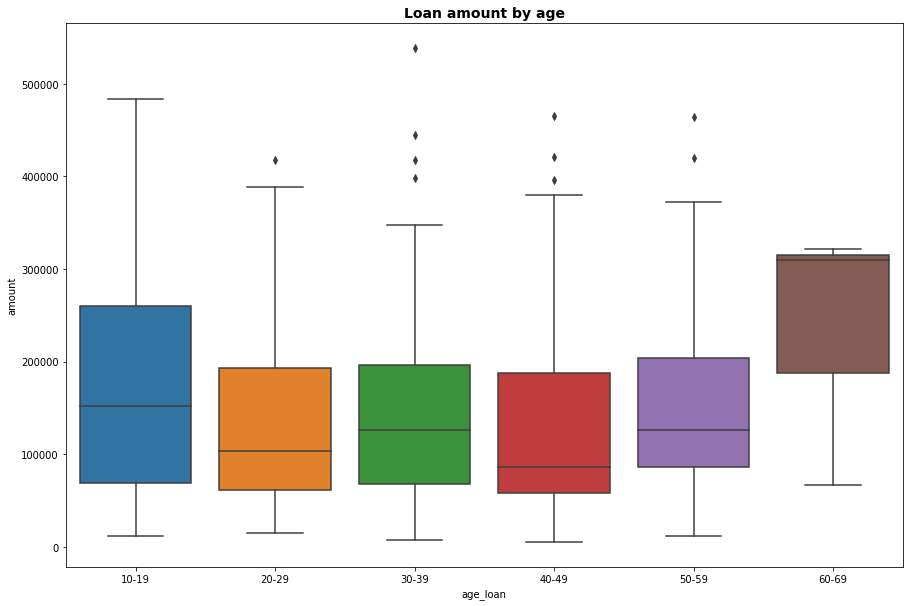

In [181]:
plot_amount_age(train_data)

In [182]:
# plot_balance_amount_age(train_data)

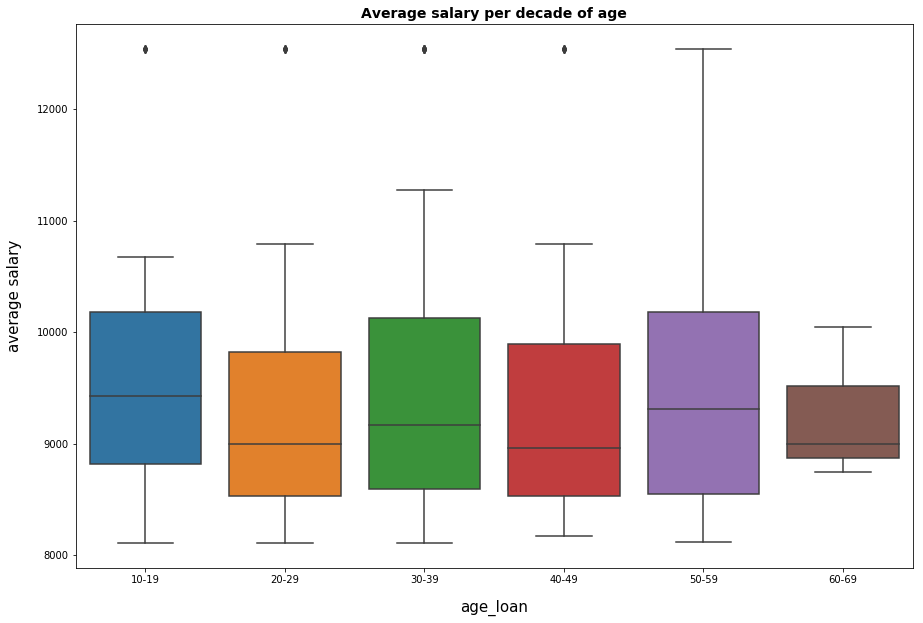

In [183]:
plot_average_decade(train_data)

From the last plots, we can see that there are some outliers in our data. However, when we try to remove them, the results when we apply the classification models were worse, so we opt to not remove them.

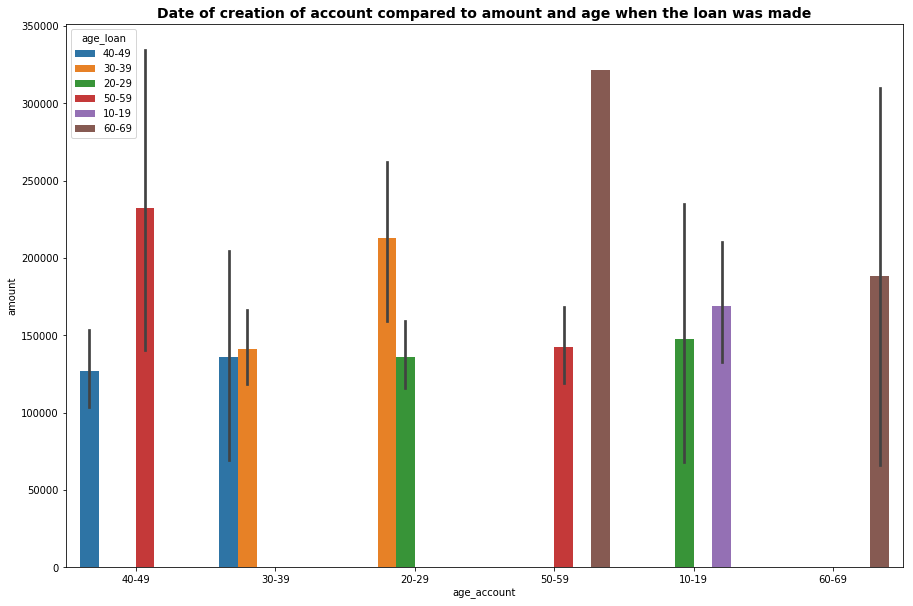

In [184]:
plot_date_amount_age(train_data)                          

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



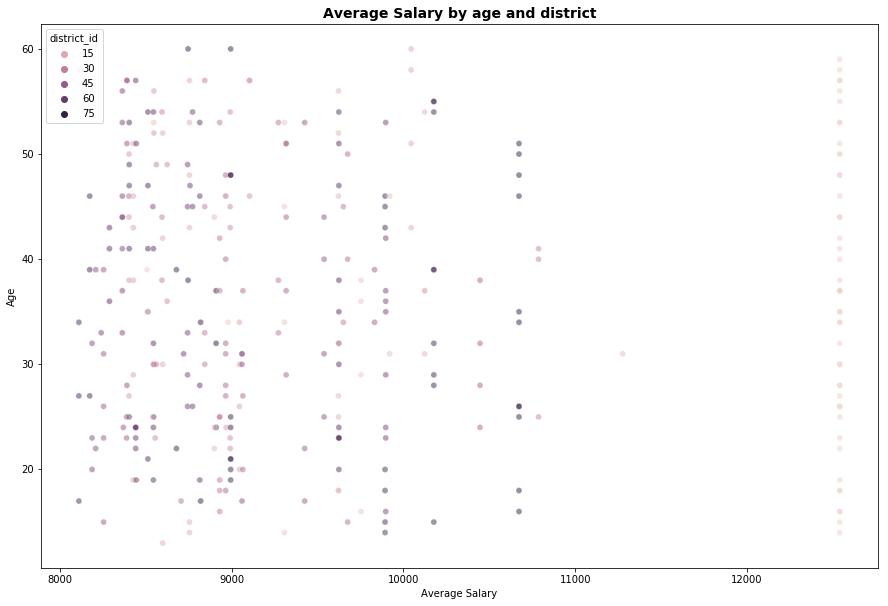

In [185]:
plot_salary_age_district(train_data)                          

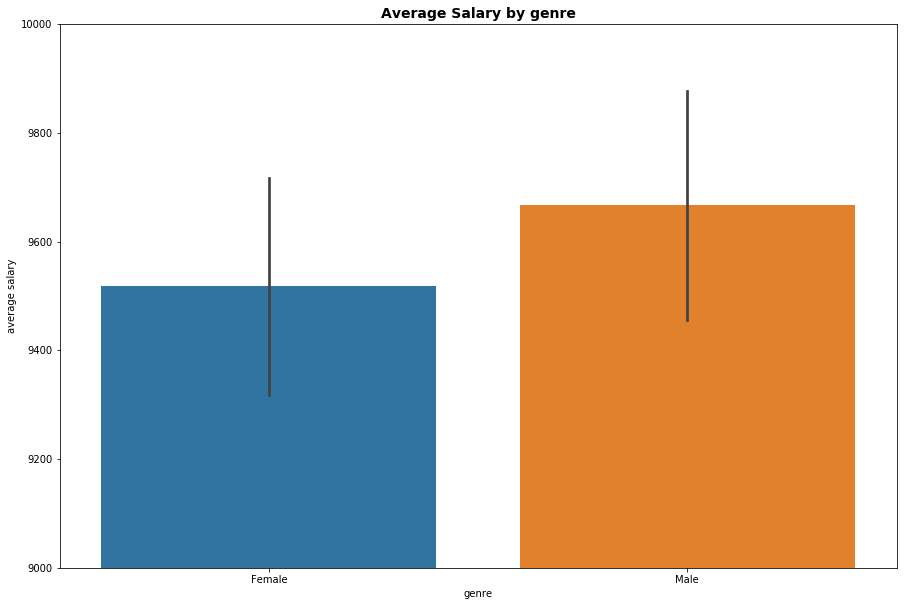

In [186]:
plot_average_genre(train_data)

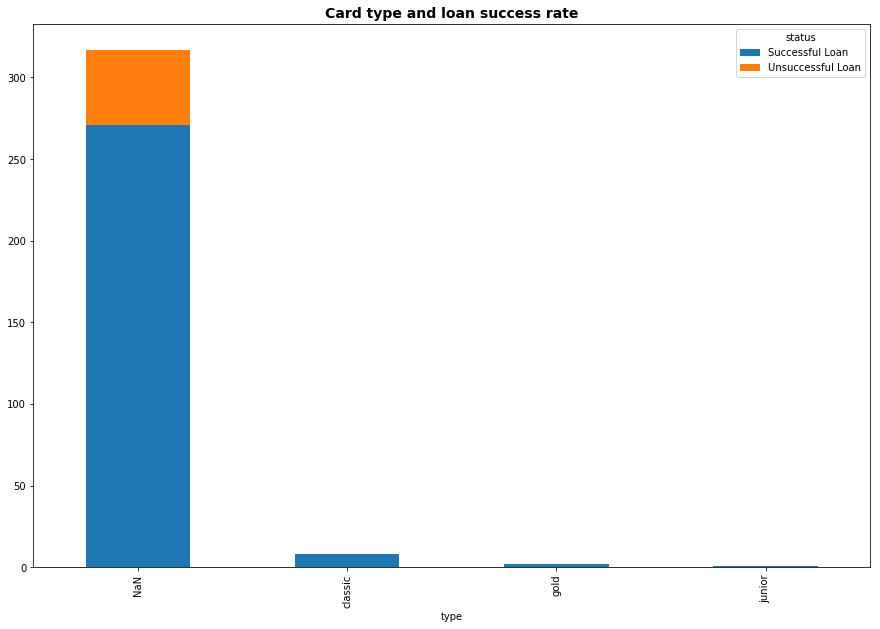

In [187]:
plot_card_success(train_data)

As we can see, all clients that have a card have a successful loan. However, there are only 11 clients with card that have asked for a loan in our dataset. So, this is not a relevant attribute for our model.

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



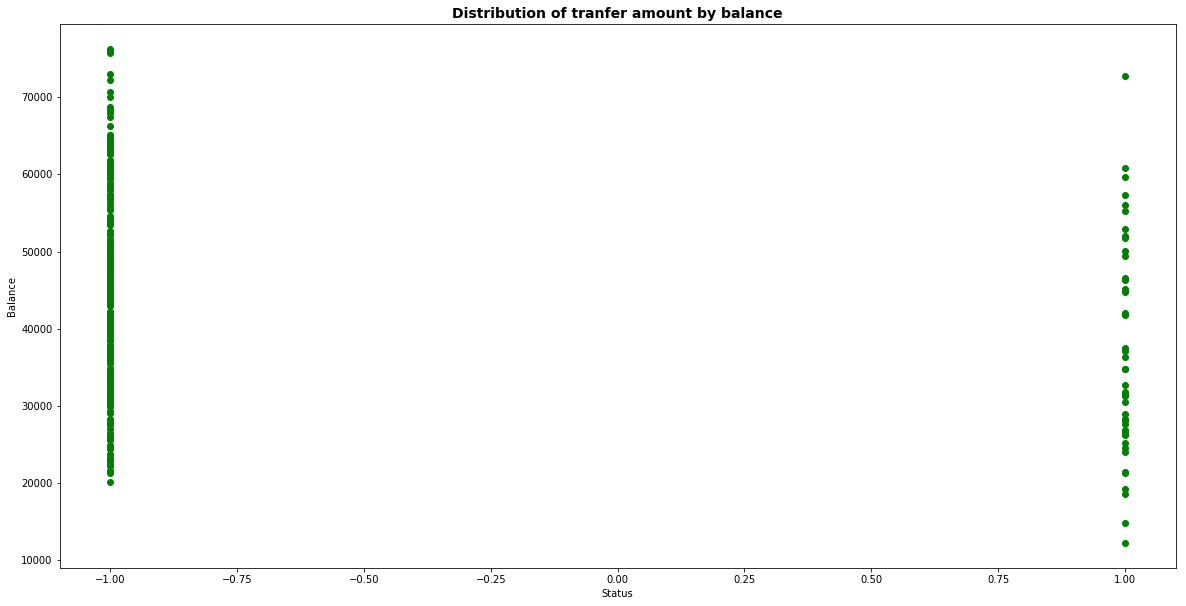

In [188]:
plot_balance_status(train_data)

There is no apparent relationship between *status* and *balance*.

[back](#index)
## Experimental Setup <a id="experimental-setup"></a>

Now that we have taken all informations that we need from all dates, we can remove these columns from our dataset. We can also remove *issued* and *type* columns as they have too many null values. As we have already seen, *amount* attribute is also to be removed. 

In [189]:
if not run_aggr:
    train_data.drop(['date', 'date_account', 'birth_number', 'age_loan', 'age_account', 'issued', 'type', 'amount'], axis=1, inplace=True)
    test_data.drop(['date', 'date_account', 'birth_number', 'age_loan', 'age_account', 'issued', 'type', 'amount'], axis=1, inplace=True)

In [190]:
option = -1
train_data, test_data = remove_columns(train_data, test_data, option)

We have some categorical attributes in our dataset that we have to transform in numerical, so we can then apply the classification models. S, let's create dummies for these variables.

In [191]:
train_data = pd.get_dummies(train_data, columns=['frequency'], dtype=bool)
test_data = pd.get_dummies(test_data, columns=['frequency'], dtype=bool)

train_data = pd.get_dummies(train_data, columns=['age_loan_range'], dtype = bool)
test_data = pd.get_dummies(test_data, columns=['age_loan_range'], dtype = bool)

if option != 1:
    train_data = pd.get_dummies(train_data, columns=['age_account_range'], dtype = bool)
    test_data = pd.get_dummies(test_data, columns=['age_account_range'], dtype = bool)

All ids in our dataset can now also be removed.

In [192]:
# Dropping ids

if not run_aggr:
    train_data_no_ids = train_data.drop(['account_id', 'district_id', 'disp_id', 'client_id', 'card_id'], axis=1)
    test_data_no_ids = test_data.drop(['account_id', 'district_id', 'disp_id', 'client_id', 'card_id'], axis=1)
else:
    train_data_no_ids = train_data.drop(['account_id', 'district_id', 'amount'], axis=1)
    test_data_no_ids = test_data.drop(['account_id', 'district_id', 'amount'], axis=1)

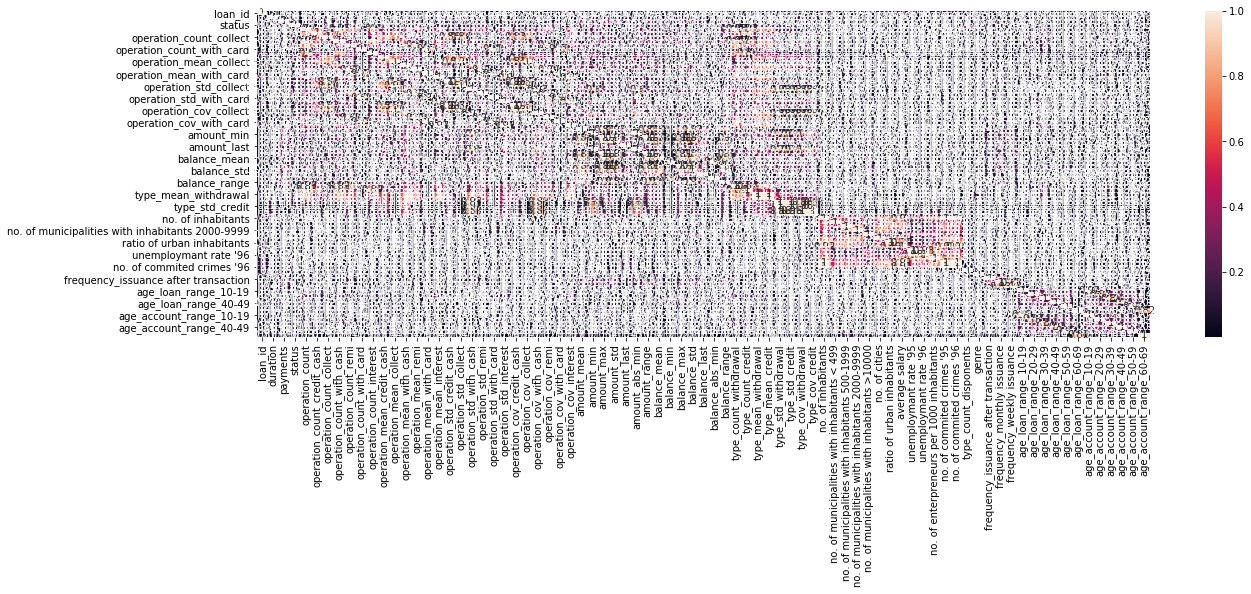

In [193]:
# Create correlation matrix
corr_matrix = train_data_no_ids.corr().abs()
plt.figure(figsize = (20,6))
sb.heatmap(corr_matrix, annot=True)

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# train_data_no_ids.drop(to_drop, axis=1, inplace=True)
# test_data_no_ids.drop(to_drop, axis=1, inplace=True)

# print("{} Dropped columns: {}".format(len(to_drop), to_drop))

In [194]:
all_inputs = train_data_no_ids[train_data_no_ids.columns.drop(['loan_id', 'status'])]
all_labels = train_data_no_ids['status'].values

In [196]:
all_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 79 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   duration                                          328 non-null    float64
 1   payments                                          328 non-null    float64
 2   operation_count                                   328 non-null    float64
 3   operation_count_credit_cash                       328 non-null    float64
 4   operation_count_collect                           328 non-null    float64
 5   operation_count_with_cash                         328 non-null    float64
 6   operation_count_remi                              328 non-null    float64
 7   operation_count_with_card                         328 non-null    float64
 8   operation_count_interest                          328 non-null    float64
 9   operation_mean_credit

[back](#index)
## Clustering <a id="clustering"></a>

#### KMEANS Clustering

In [290]:
def silhouette_scores(x,y):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(train_data_copy[[x,y]])

    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_coefficients.append(score)

    plt.style.use("fivethirtyeight")
    plt.plot(range(2, 11), silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

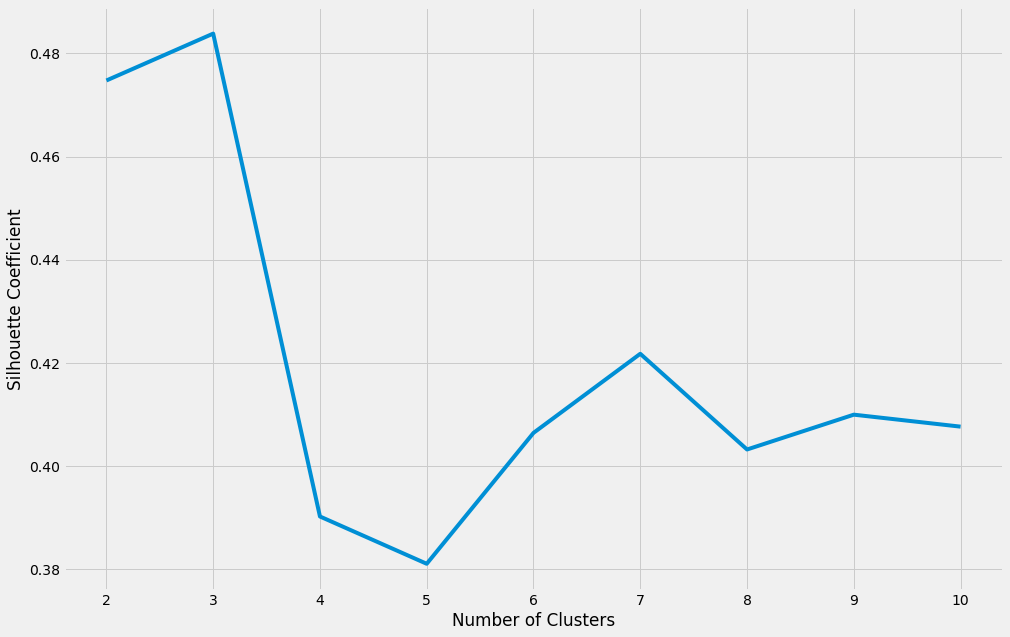

In [291]:
silhouette_scores('amount_mean','average salary')

In [297]:
def elbow_scores(x,y):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(train_data_copy[[x,y]])

    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    sse = []

    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    
    kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing")

    print("The optimal number of clusters is "+str(kl.elbow))

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



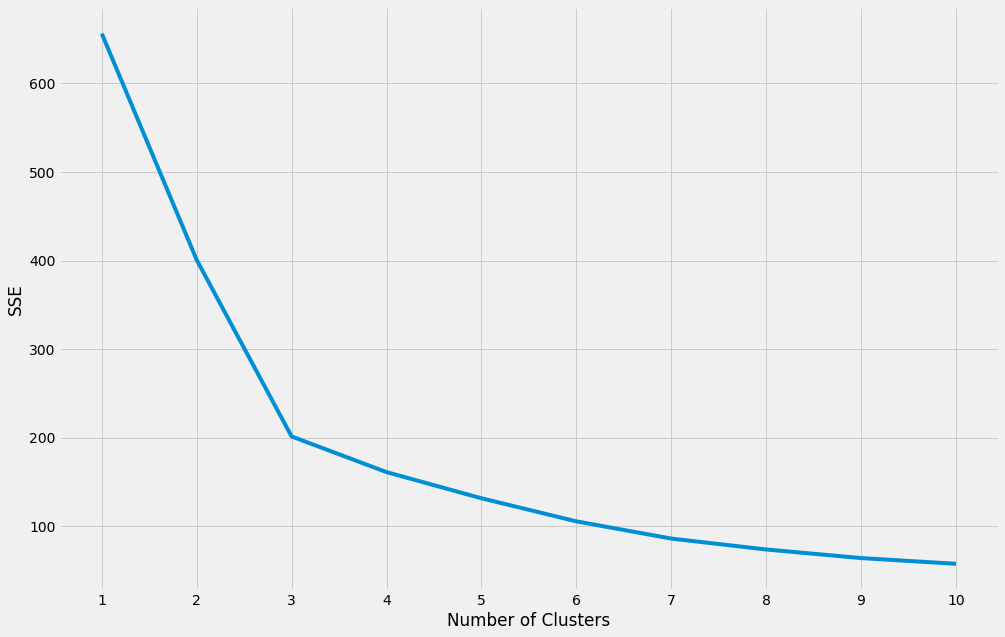

The optimal number of clusters is 3


In [298]:
elbow_scores('amount_mean','average salary')

In [306]:
def kmeans_cluster_2d(x,y, n, x_name, y_name):
    train_data_copy = all_inputs.copy()
    
    # create kmeans object
    kmeans = KMeans(n_clusters=n)
    # fit kmeans object to data
    kmeans.fit(train_data_copy[[x,y]])
    # save new clusters for chart
    identified_clusters = kmeans.fit_predict(train_data_copy[[x,y]])
    centroids = kmeans.cluster_centers_

    plt.scatter(train_data_copy[x],train_data_copy[y], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel(x_name);
    plt.ylabel(y_name);
    plt.show()

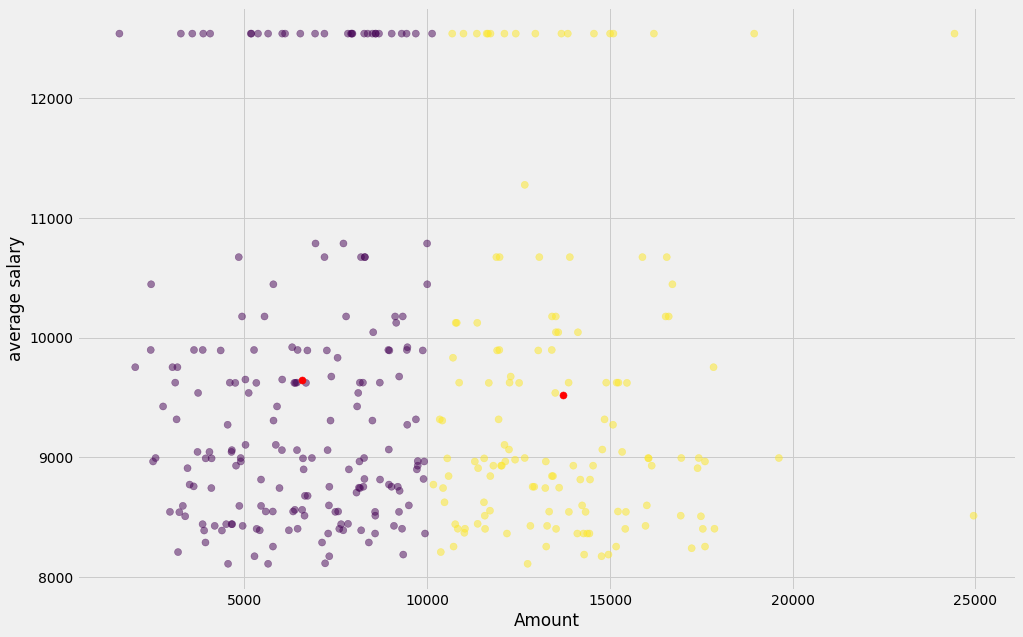

In [307]:
kmeans_cluster_2d('amount_mean','average salary',2,"Amount","average salary")

#### DBSCAN Clustering

In [345]:
def K_distance(x,y):
    from sklearn.neighbors import NearestNeighbors
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(train_data_copy[[x,y]])
    distances, indices = nbrs.kneighbors(train_data_copy[[x,y]])

    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(20,10))
    plt.plot(distances)
    plt.title('K-distance Graph',fontsize=20)
    plt.xlabel('Data Points sorted by distance',fontsize=14)
    plt.ylabel('Epsilon',fontsize=14)
    plt.show()

First we need to find a significant number for epsilon using k distance algorithm

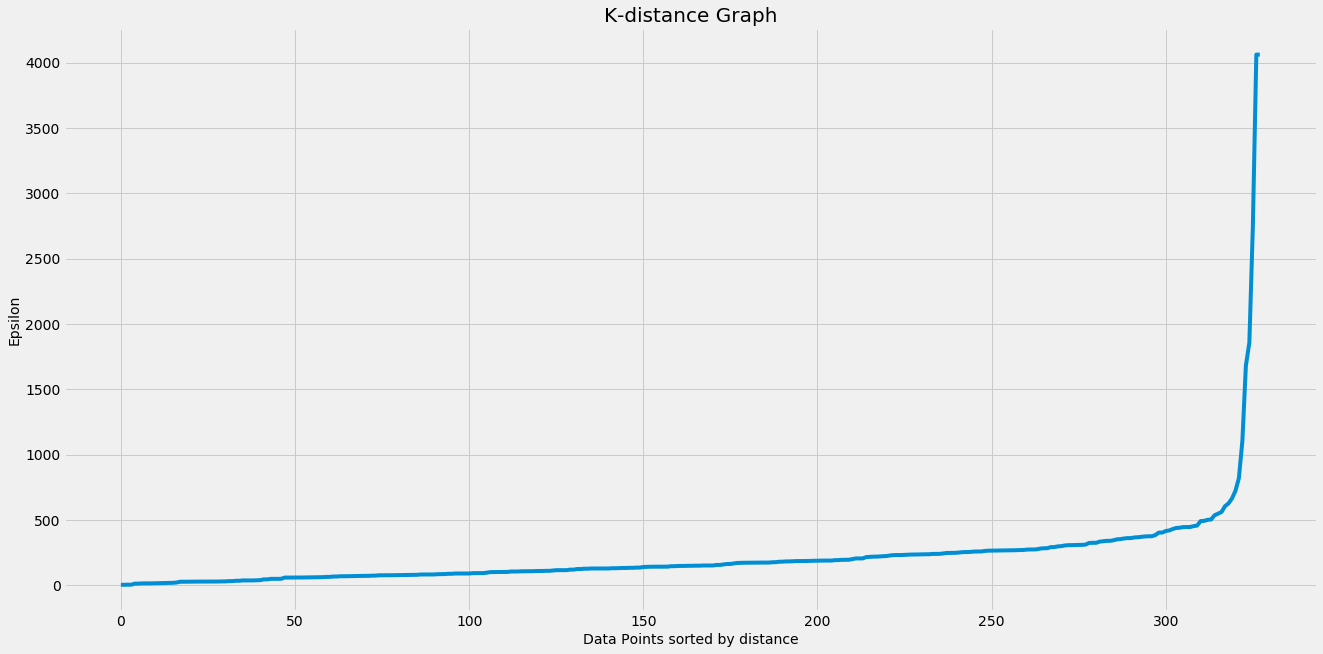

In [346]:
K_distance('amount_mean','average salary')

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is around 500 in this case.

In [358]:
def DBSCAN_cluster_2d(x,y, n, x_name, y_name):
    train_data_copy = all_inputs.copy()
    dbscan_opt=DBSCAN(eps=n,min_samples=6)
    dbscan_opt.fit(train_data_copy[[x,y]])
    
    train_data_copy['DBSCAN_opt_labels']=dbscan_opt.labels_
    train_data_copy['DBSCAN_opt_labels'].value_counts()
    
    plt.figure(figsize=(10,10))
    colors=['purple','red','blue','green']
    plt.scatter(train_data_copy[x],train_data_copy[y],c=train_data_copy['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
    plt.title('DBSCAN Clustering',fontsize=20)
    plt.xlabel(x_name,fontsize=14)
    plt.ylabel(y_name,fontsize=14)
    plt.show()

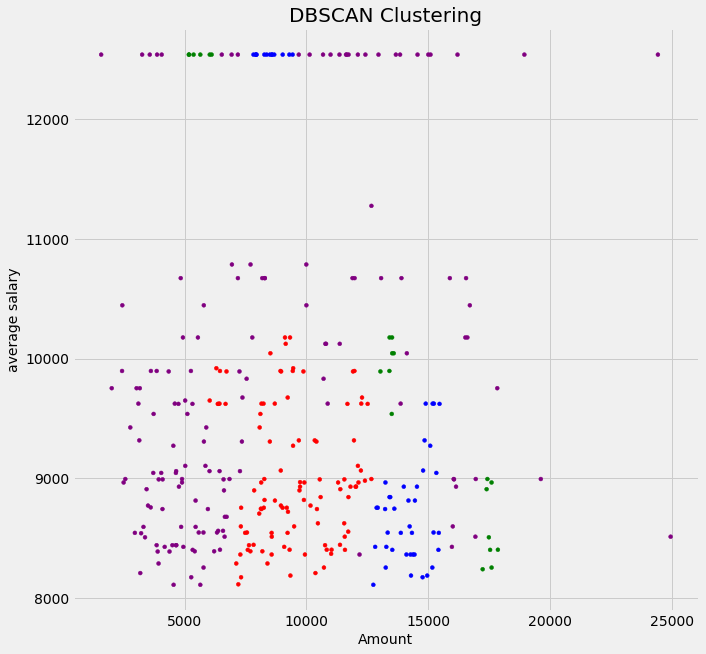

In [357]:
DBSCAN_cluster_2d('amount_mean','average salary',500,"Amount","average salary")

#### Agglomerative/Hieralchical Clustering

In [366]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative_cluster_2d(x,y, n, x_name, y_name):
    train_data_copy = all_inputs.copy()
    agglomerative=AgglomerativeClustering(n_clusters=n, affinity='euclidean')
    agglomerative.fit(train_data_copy[[x,y]])
    
    train_data_copy['HR_labels']=agglomerative.labels_

    colors=['purple','red','blue','green']
    
    # Plotting resulting clusters
    plt.figure(figsize=(10,10))
    plt.scatter(train_data_copy[x],train_data_copy[y],c=train_data_copy['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
    plt.title('Hierarchical Clustering',fontsize=20)
    plt.xlabel(x_name,fontsize=14)
    plt.ylabel(y_name,fontsize=14)
    plt.show()


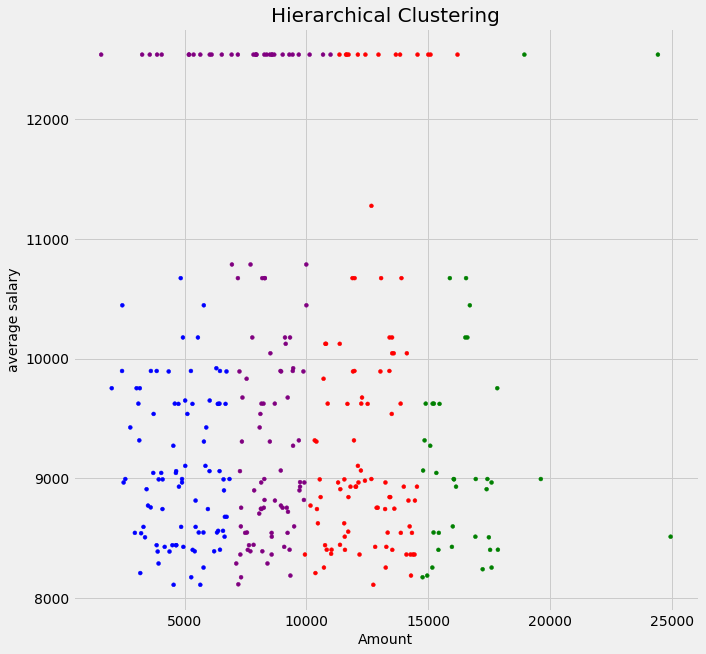

In [367]:
agglomerative_cluster_2d('amount_mean','average salary',4,"Amount","average salary")

#### Kmeans 3d

In [445]:
from mpl_toolkits.mplot3d import Axes3D
def kmeans_cluster_3d(x,y,z, n, x_name, y_name, z_name):    
    train_data_copy = all_inputs.copy()
    
    scaler = MinMaxScaler()
    train_data_copy[[x,y,z]] = scaler.fit_transform(train_data_copy[[x,y,z]])
    
    # create kmeans object
    kmeans = KMeans(n_clusters=n)
    # fit kmeans object to data
    clusts = kmeans.fit(train_data_copy[[x,y,z]])
    centroids = kmeans.cluster_centers_

    #Plot the clusters obtained using k means
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter = ax.scatter(train_data_copy[x],train_data_copy[y], train_data_copy[z],
                         c=kmeans.labels_.astype(float),s=20)


    ax.set_title('K-Means Clustering')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_zlabel(z_name)
    ax.legend()
    plt.show()

No handles with labels found to put in legend.


[[0.21071677 0.23022265 0.08454955]
 [0.33993437 1.         1.        ]
 [0.51831632 0.2208087  0.08114864]]


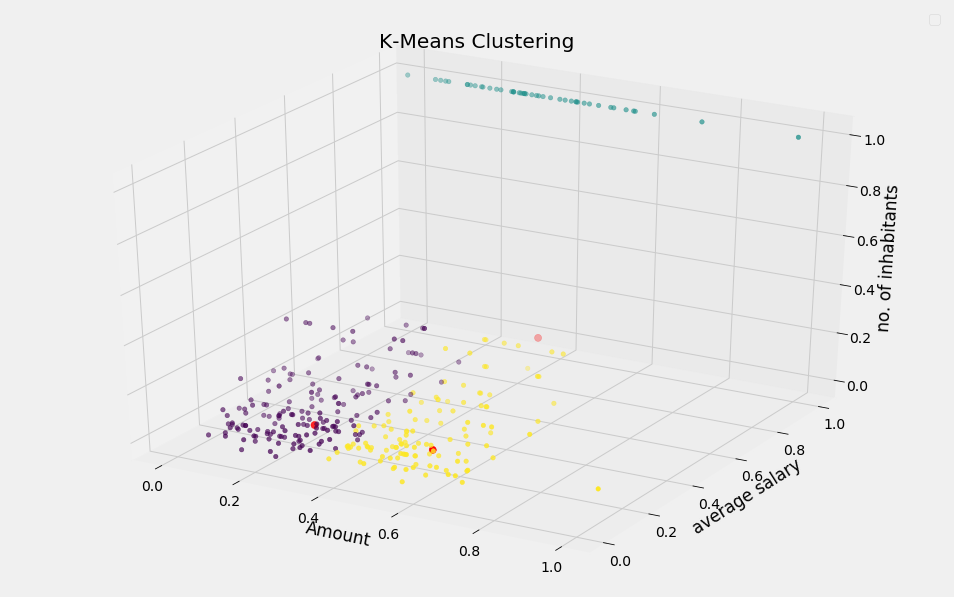

In [446]:
kmeans_cluster_3d('amount_mean','average salary','no. of inhabitants',3,"Amount","average salary", "no. of inhabitants")

[back](#index)
## Feature Selection <a id="feature-selection"></a>

In [ ]:
def featureSelection(x, y, n_feat):
    best_features = SelectKBest(score_func=f_classif, k=n_feat)
    features_fit = best_features.fit(x, y)
    
    df_scores = pd.DataFrame(features_fit.scores_)
    df_features = pd.DataFrame(x.columns)
    
    feature_scores = pd.concat([df_features, df_scores], axis=1)
    feature_scores.columns = ['Attr', 'Score']
    feature_scores = feature_scores.nlargest(n_feat, 'Score')
    
    selected_features = feature_scores['Attr'].values.tolist()
    
    print(feature_scores)
    print(selected_features)
    
    return x[selected_features]

In [ ]:
all_inputs = featureSelection(all_inputs, all_labels, 20)
print()
print()
print(all_inputs.info())
selected_columns = all_inputs.columns
app = pd.Index(['status', 'loan_id'])
selected_columns = selected_columns.append(app)
test_data_no_ids = test_data_no_ids[selected_columns]
print()
print()
test_data_no_ids.info()

In [ ]:
# get a test dataset with 25% of the credit_data_subset
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

X_train.columns = X_train.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_test.columns = X_test.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
test_data_no_ids.colums = test_data_no_ids.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [ ]:
X_train.info()

In [ ]:
test_data_no_ids.info()

In [ ]:
show_confusion = True
run_param_tunning = True
run_classifiers = False
run = False

#### [back](#index)
## Decision Tree <a class="anchor" id="decision-tree"></a>

In [ ]:
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Feature Selection
# decision_tree_classifier = RFECV(decision_tree_classifier, scoring='roc_auc')

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = decision_tree_classifier.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = decision_tree_classifier.predict(X_test) 
dtc_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_dt = f1_score(y_test, predictions_test, pos_label=-1)
roc_dt = roc_auc_score(y_test, predictions_test)
pre_dt = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_dt))
print(f"ROC: {roc_dt}")
print(f"Precision: {pre_dt}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning"></a>

In [ ]:
if run_param_tunning:
    parameter_grid = {'criterion': ['gini', 'entropy'],
                    'splitter': ['best', 'random'],
                    'max_depth': range(1, 10),
                    'max_features': range(1,16)}

    dt_classifier = DecisionTreeClassifier(min_samples_leaf = 10)

    dt_grid_search = GridSearchCV(dt_classifier, scoring="roc_auc", cv=10, param_grid=parameter_grid)
    dt_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(dt_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = dt_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_dt = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = dt_grid_search.predict(X_test) 
    dtc_tun_classification_report = classification_report(y_test, predictions_test, target_names=['not pay', 'pay'], output_dict=True)
    f1_dt_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_dt_tun = roc_auc_score(y_test, predictions_test)
    pre_dt_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_dt_tun))
    print(f"ROC: {roc_dt_tun}")
    print(f"Precision: {pre_dt_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_dt = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_dt, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## K-Nearest Neighbor <a class="anchor" id="k-nearest-neighbor"></a>

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = knn.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = knn.predict(X_test) 
knn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_knn = f1_score(y_test, predictions_test, pos_label=-1)
roc_knn = roc_auc_score(y_test, predictions_test)
pre_knn = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_knn))
print(f"ROC: {roc_knn}")
print(f"Precision: {pre_knn}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-2"></a>

In [ ]:
if run_param_tunning:
    knn_classifier = KNeighborsClassifier()

    parameter_grid = {'n_neighbors': [5, 10, 15, 20],
                      'leaf_size': [10, 20, 30, 40, 50],
                      'weights': ['uniform','distance'],
                      'p':[1,2],
                      'algorithm':['ball_tree', 'kd_tree', 'brute']}

    knn_grid_search = GridSearchCV(knn_classifier, parameter_grid, scoring="roc_auc", n_jobs=-1, cv=10)
    knn_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(knn_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = knn_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_knn = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = knn_grid_search.predict(X_test) 
    knn_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_knn_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_knn_tun = roc_auc_score(y_test, predictions_test)
    pre_knn_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_knn_tun))
    print(f"ROC: {roc_knn_tun}")
    print(f"Precision: {pre_knn_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_knn = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_knn, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Support-Vector Machines <a class="anchor" id="support-vector-machines"></a>

In [ ]:
svc = SVC(probability=True)

svc.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = svc.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = svc.predict(X_test) 
svm_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_svm = f1_score(y_test, predictions_test, pos_label=-1)
roc_svm = roc_auc_score(y_test, predictions_test)
pre_svm = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_svm))
print(f"ROC: {roc_svm}")
print(f"Precision: {pre_svm}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_svc = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_svc, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-3"></a>

In [ ]:
if run_param_tunning:
    svm_classifier = SVC(probability=True)

#     param_grid = {'C': [0.1,1, 10, 100], 
#                       'gamma': [1,0.1,0.01,0.001],
#                       'kernel': ['rbf', 'poly', 'sigmoid']}
    
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

    svm_grid_search = GridSearchCV(svm_classifier, scoring="roc_auc", cv=5, param_grid=param_grid, refit=True)
    svm_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(svm_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = svm_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_svm = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = svm_grid_search.predict(X_test) 
    svm_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_svm_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_svm_tun = roc_auc_score(y_test, predictions_test)
    pre_svm_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_svm_tun))
    print(f"ROC: {roc_svm_tun}")
    print(f"Precision: {pre_svm_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_svm = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_svm, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Neural Networks <a class="anchor" id="neural-networks"></a>

In [ ]:
scaler = StandardScaler()

# Feature Selection
#scaler = RFECV(scaler, scoring='roc_auc')

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)

# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train_nn, y_train)

predictions_test = ANNClassifier.predict(X_test_nn)

f1_nn = f1_score(y_test, predictions_test, pos_label=-1)
roc_nn = roc_auc_score(y_test, predictions_test)
pre_nn = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_nn))
print(f"ROC: {roc_nn}")
print("Precision: {}".format(pre_nn))

confusion_matrix_ann = confusion_matrix(y_test,predictions_test)

nn_classification_report = classification_report(y_test, predictions_test, output_dict=True)
print(classification_report(y_test,predictions_test))

sb.set(font_scale=1.0)

ax = plt.subplot()

sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

best_nn_classification_report = nn_classification_report

### Parameter Tunning <a class="anchor" id="parameter-tunning-4"></a>

In [ ]:
if run_param_tunning:
    parameter_grid = {'activation': ['tanh','identity','logistic','relu'],
                    'solver': ['adam','lbfgs','sgd'],
                    'hidden_layer_sizes': [10,20,30,40,50,60,70,80,90,100]}

    cross_validation = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)
    
    # Create the classifier
    nn_classifier = MLPClassifier(random_state=1, max_iter=500)

    grid_search = GridSearchCV(nn_classifier,
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            scoring="roc_auc")

    grid_search.fit(X_train, y_train)

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best estimator: {}'.format(grid_search.best_estimator_))
    ANNClassifier = grid_search.best_estimator_
    yk_pred = ANNClassifier.predict(X_test)

    best_nn_classification_report = classification_report(y_test, yk_pred, output_dict=True)

    print("--- Improved model ---\n")
    # print(f"Classification report:\n{best_nn_classification_report}\n")

    sb.set(font_scale=1.0)

    ax = plt.subplot()

    confusion_matrix_ann = confusion_matrix(y_test, yk_pred)
    
    f1_nn_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_nn_tun = roc_auc_score(y_test, predictions_test)
    pre_nn_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_nn_tun))
    print(f"ROC: {roc_nn_tun}")
    print(f"Precision: {pre_nn_tun}")

    sb.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Logistic Regression <a class="anchor" id="logistic-regression"></a>

In [ ]:
lr = LogisticRegression()

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

lr.fit(X_scaled, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = lr.predict(X_scaled)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

    
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)
    
print(53 * '=')
print("TEST")
predictions_test = lr.predict(X_scaled_test) 
lr_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_lr = f1_score(y_test, predictions_test, pos_label=-1)
roc_lr = roc_auc_score(y_test, predictions_test)
pre_lr = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_lr))
print(f"ROC: {roc_lr}")
print(f"Precision: {pre_lr}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-5"></a>

In [ ]:
if run_param_tunning:
    lr_classifier = LogisticRegression()
    
    param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'max_iter': [20, 50, 100, 200, 500, 1000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }
    
    lr_grid_search = GridSearchCV(lr_classifier, scoring="roc_auc", cv=5, param_grid={}, refit = True)
    lr_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(lr_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = lr_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_lr = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()
    
    print(53 * '=')
    print("TEST")
    predictions_test = lr_grid_search.predict(X_test) 
    lr_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_lr_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_lr_tun = roc_auc_score(y_test, predictions_test)
    pre_lr_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_lr_tun))
    print(f"ROC: {roc_lr_tun}")
    print(f"Precision: {pre_lr_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_lr = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_lr, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Naive Bayes <a class="anchor" id="naive-bayes"></a>

In [ ]:
nb = GaussianNB()

# Feature Selection
# nb = RFECV(nb, scoring='roc_auc')

nb.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = nb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = nb.predict(X_test) 
nb_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_nb = f1_score(y_test, predictions_test, pos_label=-1)
roc_nb = roc_auc_score(y_test, predictions_test)
pre_nb = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_nb))
print(f"ROC: {roc_nb}")
print(f"Precision: {pre_nb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-6"></a>

In [ ]:
if run_param_tunning:
    nb_classifier = GaussianNB()

    nb_grid_search = GridSearchCV(nb_classifier, scoring="roc_auc", cv=5, param_grid={})
    nb_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(nb_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = nb_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_nb = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = nb_grid_search.predict(X_test) 
    nb_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_nb_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_nb_tun = roc_auc_score(y_test, predictions_test)
    pre_nb_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_nb_tun))
    print(f"ROC: {roc_nb_tun}")
    print(f"Precision: {pre_nb_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_nb = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_nb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Random Forest <a class="anchor" id="random-forest"></a>

In [ ]:
rf = RandomForestClassifier()

#from sklearn.feature_selection import SelectFromModel
# Feature Selection
# rf = RFECV(rf, scoring='f1_macro')
#rf = SelectFromModel(RandomForestClassifier(n_estimators = 100))

rf.fit(X_train, y_train)
# print(rf.support_)
print(53 * '=')
print("TRAIN")
predictions_train = rf.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = rf.predict(X_test)
rf_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_rf = f1_score(y_test, predictions_test, pos_label=-1)
roc_rf = roc_auc_score(y_test, predictions_test)
pre_rf = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_rf))
print(f"ROC: {roc_rf}")
print(f"Precision: {pre_rf}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-7"></a>

In [ ]:
if run_param_tunning:
    rf_classifier = RandomForestClassifier()
    
    param_grid = {'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12]
                }

    rf_grid_search = GridSearchCV(rf_classifier, scoring="roc_auc", cv=5, param_grid=param_grid)
    rf_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(rf_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = rf_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_rf = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = rf_grid_search.predict(X_test)
    rf_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_rf_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_rf_tun = roc_auc_score(y_test, predictions_test)
    pre_rf_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_rf_tun))
    print(f"ROC: {roc_rf_tun}")
    print(f"Precision: {pre_rf_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_rf = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_rf, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## XGBoost <a class="anchor" id="xgboost"></a>

In [ ]:
xgb = XGBClassifier()

# Feature Selection
# xgb = RFECV(xgb, scoring='roc_auc')

xgb.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = xgb.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_xgb = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = xgb.predict(X_test)
xgb_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_xgb = f1_score(y_test, predictions_test, pos_label=-1)
roc_xgb = roc_auc_score(y_test, predictions_test)
pre_xgb = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_xgb))
print(f"ROC: {roc_xgb}")
print(f"Precision: {pre_xgb}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_xgb = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-8"></a>

In [ ]:
if run_param_tunning:
    xgb_classifier = XGBClassifier(metrics='rmse')
    
    param_grid = {'max-depth': [3, 6, 10],
                  'n_estimators': [100, 300, 500, 1000],
                  'learning_rate': [0.01, 0.05, 0.1],
                  'colsample_bytree': [0.3, 0.7]
                }

    xgb_grid_search = GridSearchCV(xgb_classifier, scoring='roc_auc', cv=5, param_grid=param_grid)

#     params = { 'max_depth': [3, 6, 10, 20],
#            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'subsample': [0.5, 0.7, 1],
#            'colsample_bytree': [0.4, 0.7, 1],
#            'colsample_bylevel': [0.4, 0.7, 1],
#            'n_estimators': [100, 500, 1000]}
#     xgb_classifier = XGBRegressor(seed = 20)
#     xgb_grid_search = RandomizedSearchCV(estimator=xgb_classifier,
#                              param_distributions=params,
#                              scoring='roc_auc',
#                              n_iter=25)

    xgb_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(xgb_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = xgb_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_xgb = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = xgb_grid_search.predict(X_test)
    xgb_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_xgb_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_xgb_tun = roc_auc_score(y_test, predictions_test)
    pre_xgb_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_xgb_tun))
    print(f"ROC: {roc_xgb_tun}")
    print(f"Precision: {pre_xgb_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_xgb = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_xgb, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

#### [back](#index)
## Ada Boost <a class="anchor" id="ada-boost"></a>

In [ ]:
boost = AdaBoostClassifier()

# Feature Selection
# boost = RFECV(boost, scoring='roc_auc')

boost.fit(X_train, y_train)

print(53 * '=')
print("TRAIN")
predictions_train = boost.predict(X_train)
print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
print("Classification Report: ")
print(classification_report(y_train, predictions_train))
print()
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_train, predictions_train)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

print(53 * '=')
print("TEST")
predictions_test = boost.predict(X_test) 
boost_classification_report = classification_report(y_test, predictions_test, output_dict=True)
f1_boost = f1_score(y_test, predictions_test, pos_label=-1)
roc_boost = roc_auc_score(y_test, predictions_test)
pre_boost = precision_score(y_test, predictions_test, pos_label=-1)
print("F1 Score: {}".format(f1_boost))
print(f"ROC: {roc_boost}")
print(f"Precision: {pre_boost}")
print("Classification Report: ")
print(classification_report(y_test, predictions_test))
sb.set(font_scale=1.0)
ax = plt.subplot()
confusion_matrix_boost = confusion_matrix(y_test, predictions_test)
sb.heatmap(confusion_matrix_boost, annot=True, ax=ax, fmt="g")
ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

### Parameter Tunning <a class="anchor" id="parameter-tunning-10"></a>

In [ ]:
if run_param_tunning:
    #ada_classifier = AdaBoostClassifier(random_state=0)
    
    param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}


    DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

    ada_classifier = AdaBoostClassifier(base_estimator = DTC)

    # run grid search
    ada_grid_search = GridSearchCV(ada_classifier, param_grid=param_grid, scoring = 'roc_auc')
    
    #ada_grid_search = GridSearchCV(ada_classifier, scoring="roc_auc", cv=5, param_grid=grid)
    ada_grid_search.fit(X_train, y_train)
    print('Best score: {}'.format(ada_grid_search.best_score_))


    print(53 * '=')
    print("TRAIN")
    predictions_train = ada_grid_search.predict(X_train)
    print("F1 Score: {}".format(f1_score(y_train, predictions_train, pos_label=-1)))
    print(f"ROC: {roc_auc_score(y_train, predictions_train)}")
    print("Precision: {}".format(precision_score(y_train, predictions_train, pos_label=-1)))
    print("Classification Report: ")
    print(classification_report(y_train, predictions_train, output_dict=True))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_ada = confusion_matrix(y_train, predictions_train)
    sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

    print(53 * '=')
    print("TEST")
    predictions_test = ada_grid_search.predict(X_test) 
    ada_tun_classification_report = classification_report(y_test, predictions_test, output_dict=True)
    f1_boost_tun = f1_score(y_test, predictions_test, pos_label=-1)
    roc_boost_tun = roc_auc_score(y_test, predictions_test)
    pre_boost_tun = precision_score(y_test, predictions_test, pos_label=-1)
    print("F1 Score: {}".format(f1_boost_tun))
    print(f"ROC: {roc_boost_tun}")
    print(f"Precision: {pre_boost_tun}")
    print("Classification Report: ")
    print(classification_report(y_test, predictions_test))
    sb.set(font_scale=1.0)
    ax = plt.subplot()
    confusion_matrix_ada = confusion_matrix(y_test, predictions_test)
    sb.heatmap(confusion_matrix_ada, annot=True, ax=ax, fmt="g")
    ax.set_xlabel('Predicted Grades');
    ax.set_ylabel('Observed Grades');
    ax.set_title('Confusion Matrix');
    plt.show()

In [ ]:
table = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC AUC Score Normal', 'Precision']),
                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'XGB', 'ADA BOOST'], 
                                    [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svm_classification_report['accuracy'], nn_classification_report['accuracy'], lr_classification_report['accuracy'], nb_classification_report['accuracy'], rf_classification_report['accuracy'], xgb_classification_report['accuracy'], boost_classification_report['accuracy']], 
                                    [f1_dt, f1_knn, f1_svm, f1_nn, f1_lr, f1_nb, f1_rf, f1_xgb, f1_boost], 
                                    [roc_dt, roc_knn, roc_svm, roc_nn, roc_lr, roc_nb, roc_rf, roc_xgb, roc_boost],
                                    [pre_dt, pre_knn, pre_svm, pre_nn, pre_lr, pre_nb, pre_rf, pre_xgb, pre_boost]
                                   ]))
                     ])

table.show()

In [ ]:
if run_param_tunning:
    table1 = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Accuracy Normal', 'F1 Score Normal', 'ROC AUC Score Normal', 'Precision']),
                 cells=dict(values=[['DT', 'KNN', 'SVM', 'NN', 'LR', 'NB', 'RF', 'XGB', 'ADA BOOST'], 
                                    [dtc_tun_classification_report['accuracy'], knn_tun_classification_report['accuracy'], svm_tun_classification_report['accuracy'], best_nn_classification_report['accuracy'], lr_tun_classification_report['accuracy'], nb_tun_classification_report['accuracy'], rf_tun_classification_report['accuracy'], xgb_tun_classification_report['accuracy'], ada_tun_classification_report['accuracy']], 
                                    [f1_dt_tun, f1_knn_tun, f1_svm_tun, f1_nn_tun, f1_lr_tun, f1_nb_tun, f1_rf_tun, f1_xgb_tun, f1_boost_tun], 
                                    [roc_dt_tun, roc_knn_tun, roc_svm_tun, roc_nn_tun, roc_lr_tun, roc_nb_tun, roc_rf_tun, roc_xgb_tun, roc_boost_tun],
                                    [pre_dt_tun, pre_knn_tun, pre_svm_tun, pre_nn_tun, pre_lr_tun, pre_nb_tun, pre_rf_tun, pre_xgb_tun, pre_boost_tun]
                                   ]))
                                 ])

    table1.show()
    
    

#### [back](#index)
## Apply Model <a class="anchor" id="apply-model"></a>

In [ ]:
test_data_no_ids.info()

In [ ]:
test_inputs = test_data_no_ids.drop(columns=['status', 'loan_id'])
all_ids_comp = test_data['loan_id'].values

pred_comp = xgb_grid_search.predict_proba(test_inputs)

pred_comp = pd.DataFrame(pred_comp, columns=['col2', 'Predicted'])

pred_comp.drop('col2', axis=1, inplace=True)
all_ids_comp = pd.DataFrame(all_ids_comp, columns=['Id'])
# pred_comp['Predicted'] = [(1 - pred_comp['Predicted'][n]) for n in range(len(pred_comp))]
results = pd.concat([all_ids_comp, pred_comp], axis=1)
results = results.rename(columns={"loan_id":"Id"})
# results.loc[results['Predicted']<0.03,'Predicted']=0
# results.loc[results['Predicted']>0.97,'Predicted']=1
results.to_csv('results.csv', index = False)

print(results)